# Problem statement 
> Objective
* To develop a machine learning model to predict medical insurance charges based on individual characteristics, including age, sex, BMI, number of children, smoking habits, and region.

# Importing Libraries 


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import statsmodels.api as sm
from scipy.stats import shapiro,kstest,normaltest
import warnings
warnings.filterwarnings("ignore")
import pickle,json

# Data Gathering

In [3]:
df=pd.read_csv("medical_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


* In above cell output we got data in Dataframe 

# EDA

In [4]:
df.describe()  # Generate descriptive statistics 

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


* In above cell result we see the Minimum, Maximum , Mean , Standard Deviation of the features having Numerical values.
* Object data type is excluded in descriptive statistics.
* We can get a rough idea about the data through descriptive statistics.

In [5]:
df.info()  # Summary of a DataFrame 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


* In above cell output we got Information about DataFrame including the index dtype and columns, non-null values and memory usage.

In [6]:
df  # Our DataFrame 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


* We have 3 features in our data that have Object data type.
* For evaluation of the data we need to convert them in to Numeric format.
* Machine learning model understands only numbers so we will need to convert them in numeric format.
* We have 3 features in Object data type
> sex 
> smoker
> region 
* We will work on each feature one by one.

### sex

In [11]:
df["sex"].value_counts() # Return a Series containing counts of unique values.

sex
male      676
female    662
Name: count, dtype: int64

* So we have 2 unique values male and female.
* We will do Label Encoding as only 2 values are present.

In [12]:
df["sex"].replace({"male":1,"female":0},inplace=True)  # Label Encoding

In [13]:
df["sex"].value_counts() # Return a Series containing counts of unique values.

sex
1    676
0    662
Name: count, dtype: int64

* We have replaced the values of the sex feature in Numeric format.
* Now we will check for smoker feature.

### smoker

In [15]:
df["smoker"].value_counts() # Return a Series containing counts of unique values.

smoker
no     1064
yes     274
Name: count, dtype: int64

* So we have 2 unique values no and yes.
* We will do Label Encoding as only 2 values are present.

In [16]:
df["smoker"].replace({"yes":0,"no":1},inplace=True)  # Label encoding

In [17]:
df["smoker"].value_counts() # Return a Series containing counts of unique values.

smoker
1    1064
0     274
Name: count, dtype: int64

* We have replaced the values of the smoker feature in Numeric format.
* Now we will check for region feature.

### region

In [18]:
df["region"].value_counts() # Return a Series containing counts of unique values.

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

* We have 4 unique values.
* These values donot have order and as it is direction we need to do One hot encoding.

In [19]:
df=pd.get_dummies(df,columns=["region"],dtype=int) # One hot encoding
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,0,16884.92400,0,0,0,1
1,18,1,33.770,1,1,1725.55230,0,0,1,0
2,28,1,33.000,3,1,4449.46200,0,0,1,0
3,33,1,22.705,0,1,21984.47061,0,1,0,0
4,32,1,28.880,0,1,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1,10600.54830,0,1,0,0
1334,18,0,31.920,0,1,2205.98080,1,0,0,0
1335,18,0,36.850,0,1,1629.83350,0,0,1,0
1336,21,0,25.800,0,1,2007.94500,0,0,0,1


* We now we will see Each feature its distribution and its relation with Target varaiable one by one.
* We will check for Nan values and Extreme Outliers of each feature.  

### Feature : age 

<Axes: xlabel='age', ylabel='Count'>

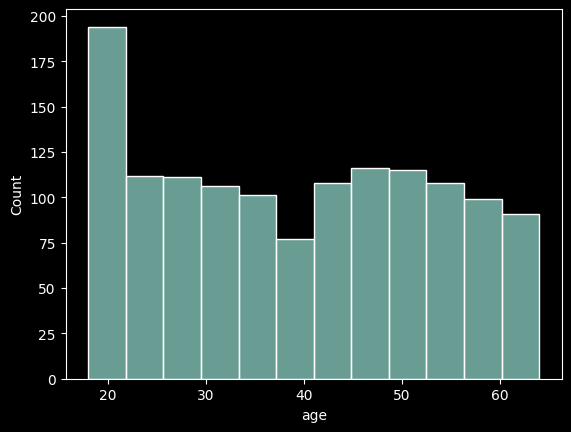

In [23]:
sns.histplot(df["age"])   # data visualization and exploration

<Axes: xlabel='age', ylabel='Density'>

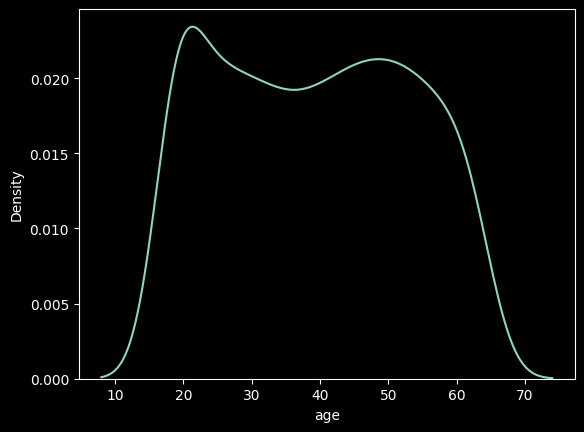

In [21]:
sns.kdeplot(df["age"])  # data visualization and exploration

* Kdeplot(Kernel Density plot) shows the distribution of data by use of Bell shaped curve.
* Histplot shows the distribution of data by use of Bell shaped curve.

<Axes: xlabel='age'>

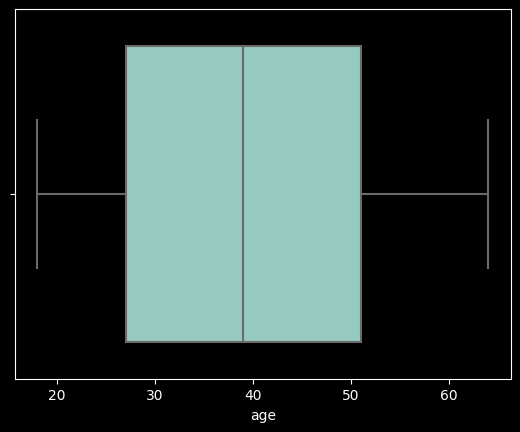

In [25]:
sns.boxplot(x=df["age"],whis=3) # To check Extreme Outliers 

* No Extreme Outliers are present in age features tells Boxplot.

In [27]:
df["age"].isna().sum()  # To check Nan Values 

0

* No Nan Values are present in age feature.

<Axes: xlabel='age', ylabel='charges'>

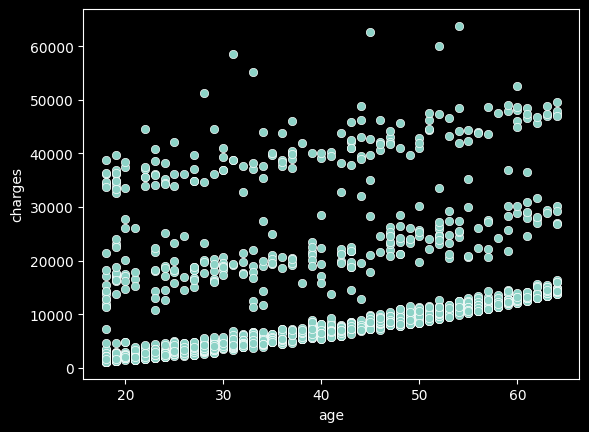

In [29]:
sns.scatterplot(x=df["age"],y=df["charges"]) # Multivariate Analysis, To check linear realtionship
                                            # between age and target feature 

* Above visualization tells us that there is a linear relationship between age and target varaible.

# Feature sex
* In this feature we have have done Label encoding.
* Lets explore more about this feature. 

In [31]:
df["sex"].value_counts() #  Return a Series containing counts of unique values.

sex
1    676
0    662
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='Count'>

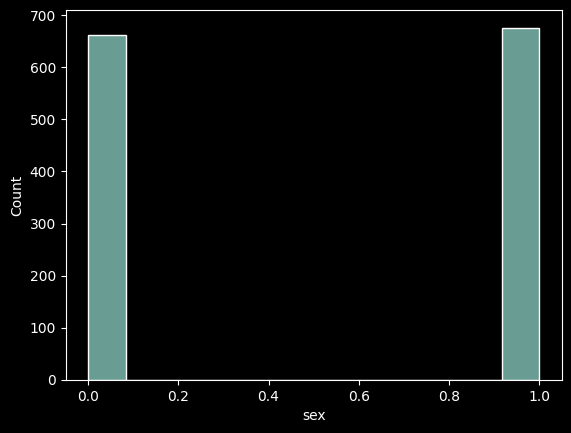

In [32]:
sns.histplot(df["sex"])

<Axes: xlabel='sex', ylabel='Density'>

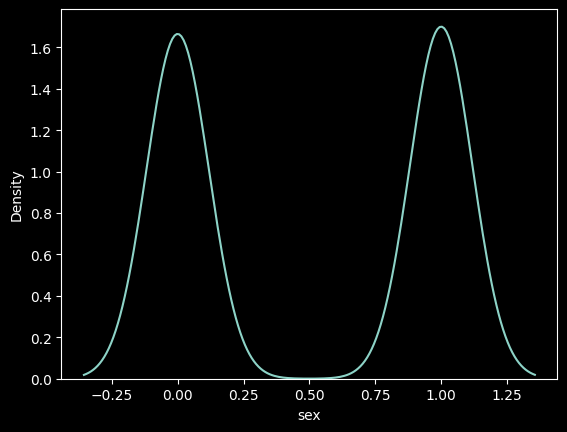

In [33]:
sns.kdeplot(df["sex"])

* Above Visualization in Histplot and kdeplot tells us that as there are only 2 values in the feature (0 and 1) we are getting difference in graphs where only these 2 values are present.

In [34]:
df["sex"].isna().sum() # To check Nan Values

0

* There are no Nan Values present in the sex feature

<Axes: xlabel='sex'>

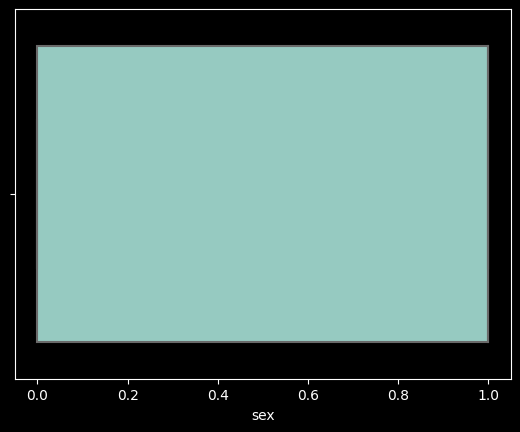

In [39]:
sns.boxplot(x=df["sex"],whis=3)  # To check for Extreme Outliers

* Boxplot shows that there are no extreme outliers.

<Axes: xlabel='sex', ylabel='charges'>

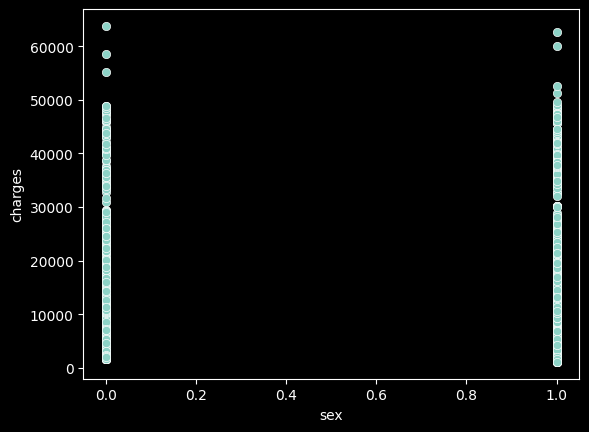

In [35]:
sns.scatterplot(x=df["sex"],y=df["charges"])

* Above Visualization gives a rough idea that irrespective of Male and female as age is increasing insurance charges are also increasing. 

# Feature bmi

<Axes: xlabel='bmi', ylabel='Count'>

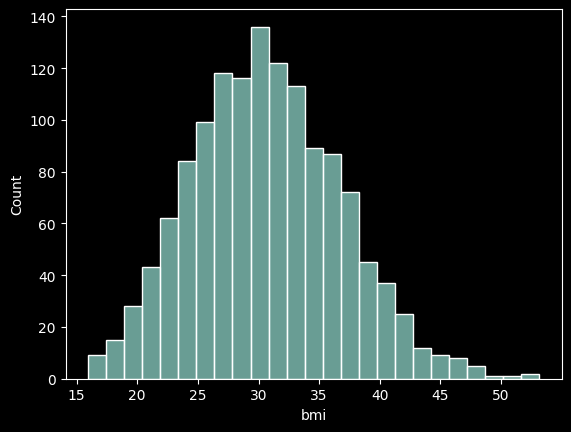

In [36]:
sns.histplot(df["bmi"])

<Axes: xlabel='bmi', ylabel='Density'>

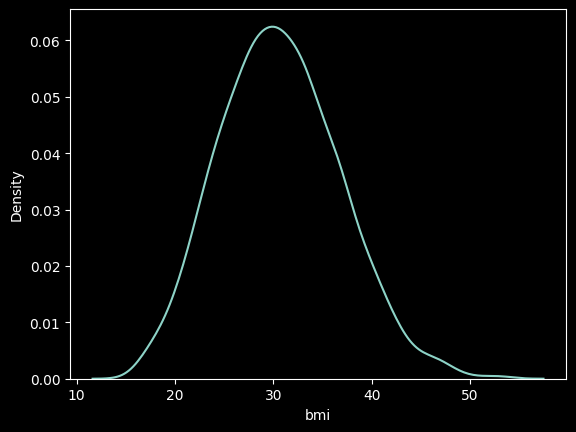

In [40]:
sns.kdeplot(df["bmi"])

* Histplot and Kdeplot shows that :
* Data of bmi feature is right skewed as tail is present in the graph on the right side.
* We need to check for extreme outliers.

<Axes: xlabel='bmi'>

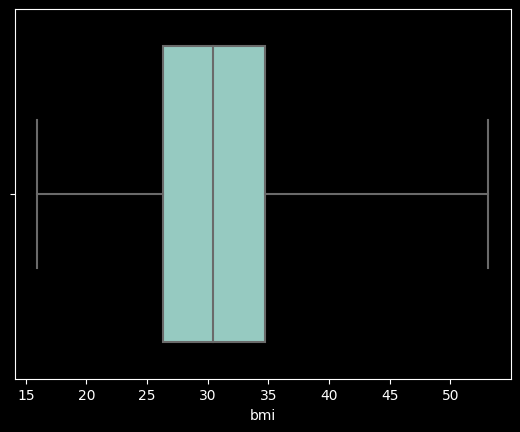

In [41]:
sns.boxplot(x=df["bmi"],whis=3) # To check for extreme outliers

* We will also reduce the whis in boxplot or set it default to see it there are oultiers.

<Axes: xlabel='bmi'>

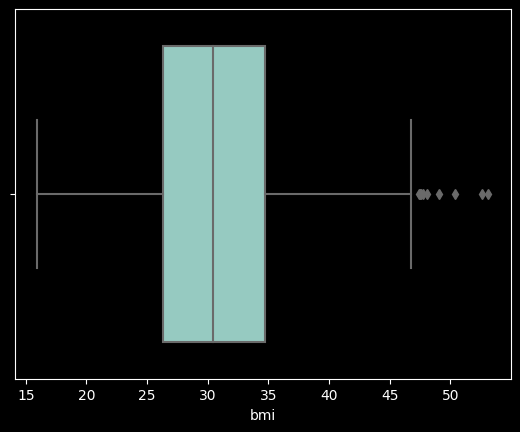

In [42]:
sns.boxplot(x=df["bmi"])

<Axes: xlabel='bmi'>

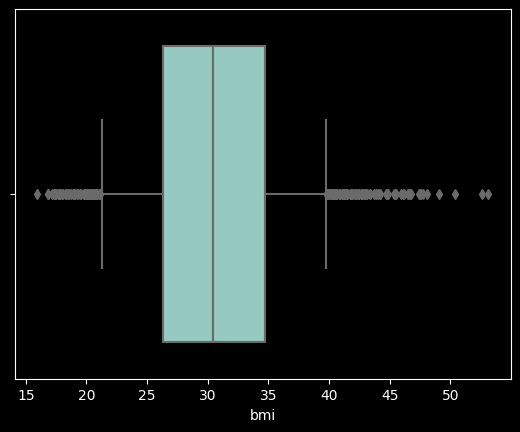

In [51]:
sns.boxplot(x=df["bmi"],whis=0.6)

* In above visual representation we can see Outliers present.
* bmi above 40 is consirded as extremely Obese and bmi below 20 is consirded as Body weight deficit.
* We will see how many people are there where bmi is above 40 and below 20 using IQR method. 

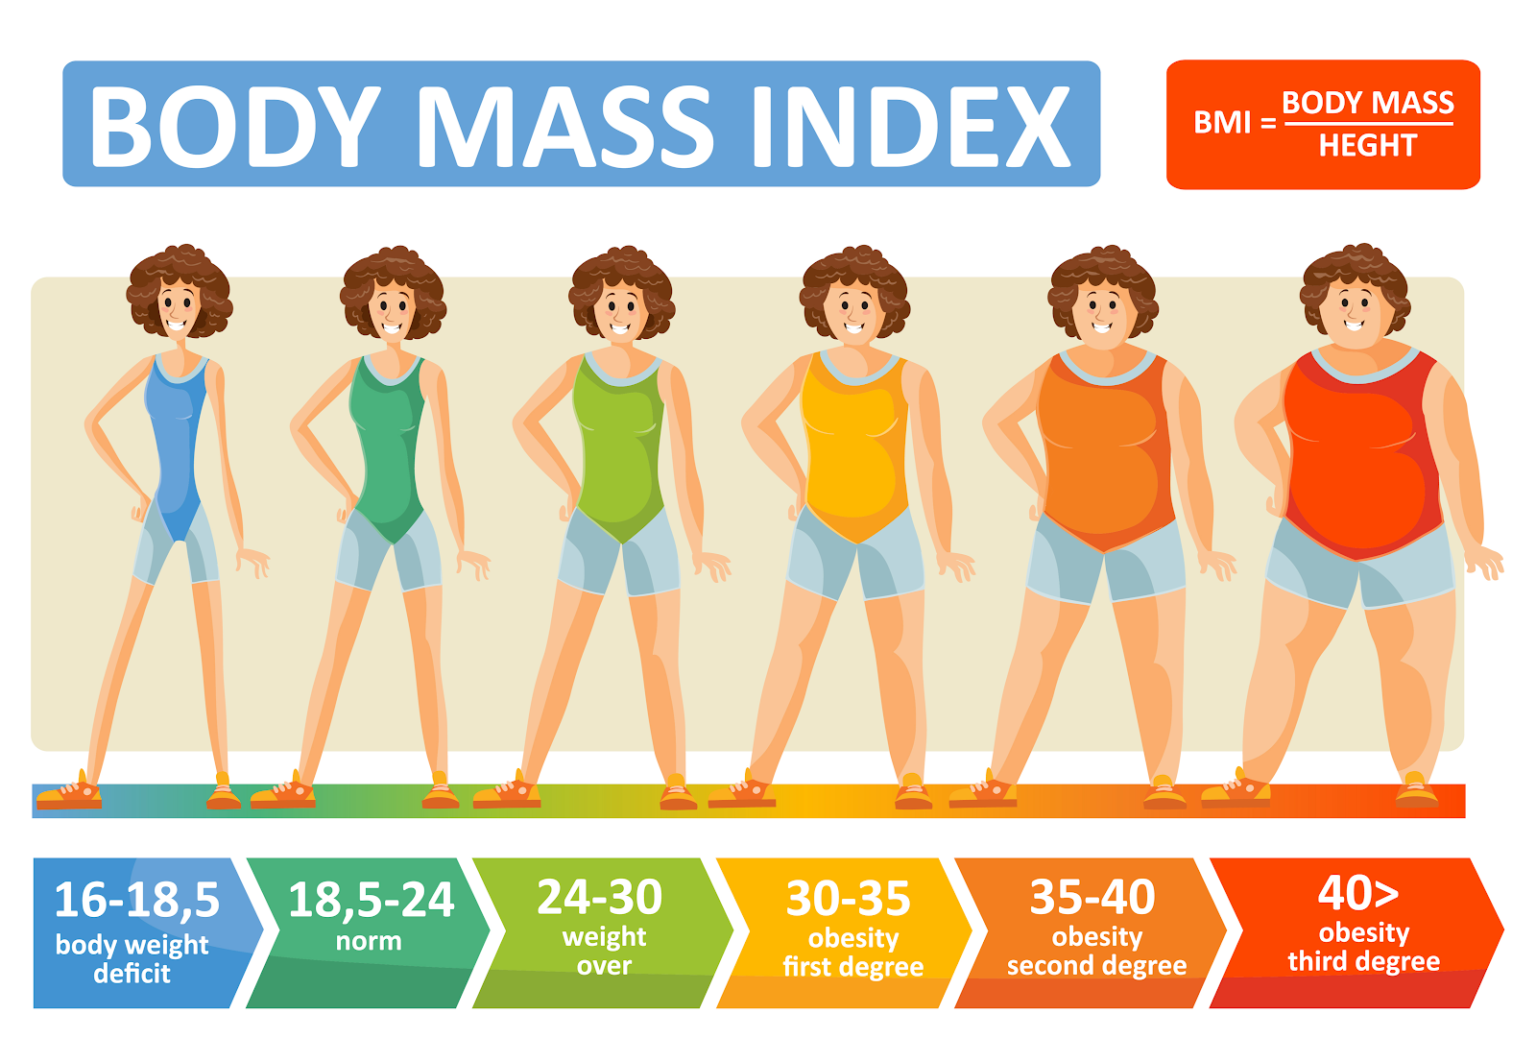

In [53]:
q1 = df["bmi"].quantile(0.25)   # IQR method : To check for outliers
q2 = df["bmi"].quantile(0.50)
q3 = df["bmi"].quantile(0.75)

iqr = q3 - q1
print("IQR >> ",iqr)

upper_tail = q3 + 0.6 * iqr
lower_tail = q1 - 0.6 * iqr

print("UpperTail :",upper_tail)
print("Lower Tail : ",lower_tail)

IQR >>  8.3975
UpperTail : 39.73225
Lower Tail :  21.25775


* We will check for values which are above upper_tail and below lower_tail.

In [55]:
np.where(df["bmi"]>upper_tail) # To check for Index where bmi is above upper_tail

(array([  13,   14,   18,   39,   78,   83,  116,  170,  185,  209,  227,
         257,  265,  281,  286,  292,  323,  344,  356,  358,  377,  383,
         401,  438,  442,  454,  480,  493,  521,  530,  534,  543,  547,
         549,  554,  563,  566,  569,  572,  582,  594,  627,  640,  650,
         656,  660,  674,  676,  687,  695,  701,  702,  713,  720,  728,
         777,  781,  790,  796,  803,  806,  811,  847,  860,  867,  895,
         898,  901,  908,  930,  941,  942,  944,  951,  973,  976,  978,
        1024, 1047, 1062, 1067, 1088, 1124, 1131, 1132, 1156, 1159, 1161,
        1166, 1172, 1180, 1201, 1225, 1239, 1240, 1248, 1312, 1317, 1323,
        1332], dtype=int64),)

In [56]:
np.where(df["bmi"]<lower_tail) # To check for Index where bmi is below lower_tail

(array([  28,   35,   37,   98,   99,  128,  169,  172,  182,  198,  232,
         248,  250,  266,  276,  359,  370,  380,  395,  400,  404,  408,
         410,  411,  412,  428,  431,  560,  584,  586,  591,  613,  680,
         681,  684,  769,  793,  812,  821,  863,  896,  927,  950,  972,
         989,  990,  994, 1004, 1011, 1027, 1029, 1074, 1082, 1085, 1100,
        1109, 1119, 1129, 1133, 1205, 1226, 1251, 1260, 1286, 1290, 1302,
        1316], dtype=int64),)

* Too many Values are present in data which are outliers.
* We will check how bmi and charges are related 

<Axes: xlabel='bmi', ylabel='charges'>

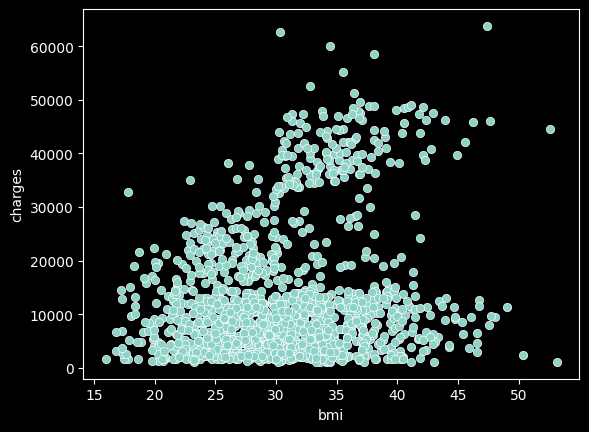

In [57]:
sns.scatterplot(x=df["bmi"],y=df["charges"]) # To check relationship between bmi and charges feature

* There is no strong correlation between bmi and charges but still it is affecting the target feature as seen in the above graph.

In [58]:
df["bmi"].mean() # to check for mean of bmi feature

30.66339686098655

In [59]:
df["bmi"].median() # to check for median of bmi feature

30.4

In [60]:
df["bmi"].mode() # to check for mode of bmi feature

0    32.3
Name: bmi, dtype: float64

* Discussing with domain expert we came to the conclusion that we need to Impute Oultiers with upper tail and lower tail.
* We have options to replace outliers with mean , median , mode , zero , Upper Tail , Lower tail , Static value.
* In Our case if we consider replacing outliers with mean , median , mode where values are between 30 to 32 ,bmi can be possible upto 40 as Obese people is new normal in our society.
* So we assume that people of bmi upto 40 and bmi upto 20 is possible many cases.
* But BMI values above 40 and below 20 are extremely rare cases.
* So we assume that these values of BMI were Human errors.
* We will replace our Outlier values with Upper Tail values and lower tail values as discussed with our domain expert.

In [61]:
df["bmi"] = np.where(df["bmi"]>upper_tail , upper_tail , df["bmi"]) 
# Replacing outliers with upper tail values which are above upper tail.

In [62]:
df["bmi"] = np.where(df["bmi"]<lower_tail , lower_tail , df["bmi"])
# Replacing outliers with lower tail values which are below lower tail.

<Axes: xlabel='bmi'>

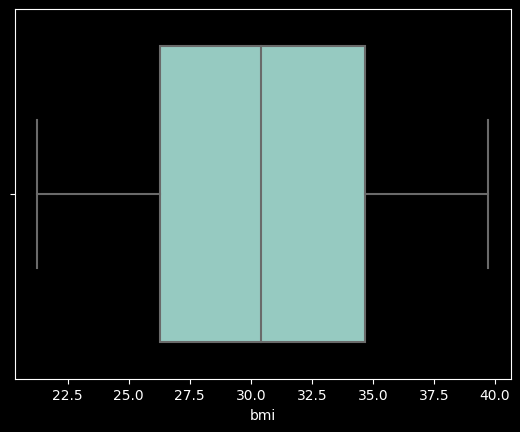

In [63]:
sns.boxplot(x=df["bmi"],whis=0.6) # to check for outliers

* We have replaced outliers with Upper Tail values and lower tail values.
* Now we dont have any outliers present in the data.

In [64]:
df["bmi"].isna().sum() # To check for Nan Values

0

* There are no Nan Values in the data.

# Feature children

In [68]:
df["children"].value_counts() #  Return a Series containing counts of unique values.

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

* In children feature we have data of customers having upto maximum 5 childrens till not having any childrens at all.
* Maximum number of customers dont have children in our data.

<Axes: xlabel='children', ylabel='Count'>

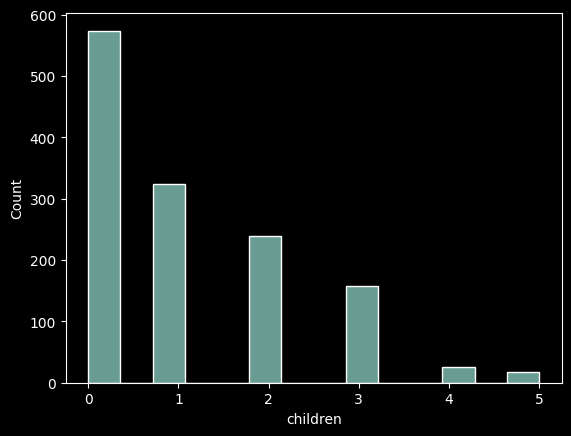

In [65]:
sns.histplot(df["children"])

<Axes: xlabel='children', ylabel='Density'>

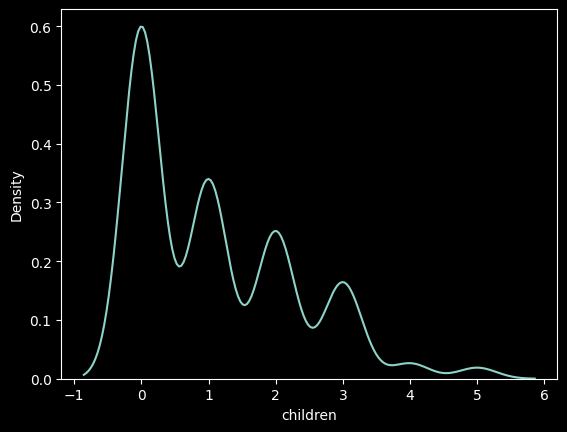

In [66]:
sns.kdeplot(df["children"])

* In above Visualization in Histplot and KdePlot we see that we have values are ranging between value 0 to 5.And we have maximum values with 0 (No children) and lowest for 5(5 children).

<Axes: xlabel='children', ylabel='charges'>

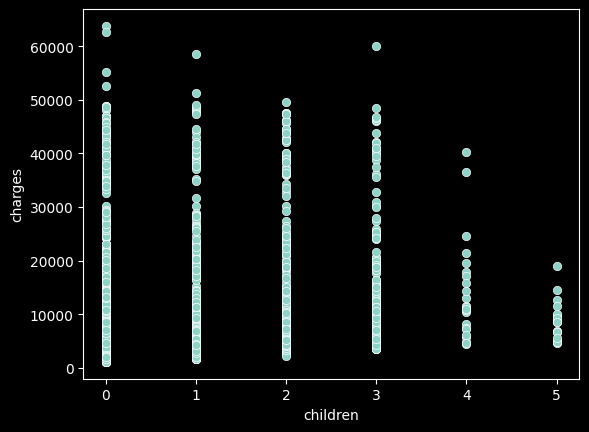

In [69]:
sns.scatterplot(x=df["children"],y=df["charges"])

* In Above Visualization of Scatterplot we see that there is no direct corelation between the values of children and the values of charges.
* In case of 5 children too we see less charges are applied for insurance.
* So we assume that number of children donot affect on the Target variable.

In [70]:
df["children"].isna().sum()  # To check for Nan Values

0

* There are No Nan Values present in the children feature.

# Feature smoker 

In [74]:
df["smoker"].value_counts() #  Return a Series containing counts of unique values.

smoker
1    1064
0     274
Name: count, dtype: int64

<Axes: xlabel='smoker', ylabel='Count'>

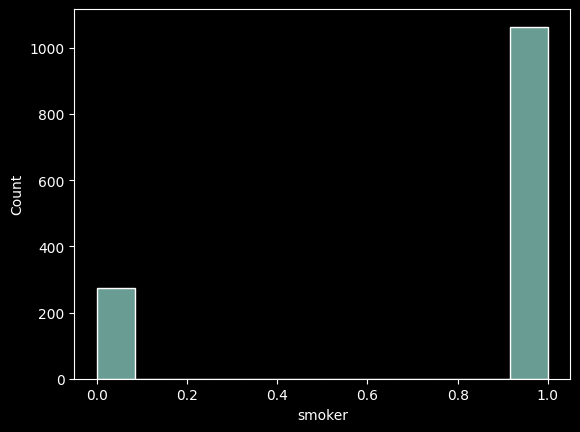

In [71]:
sns.histplot(df["smoker"])

<Axes: xlabel='smoker', ylabel='Density'>

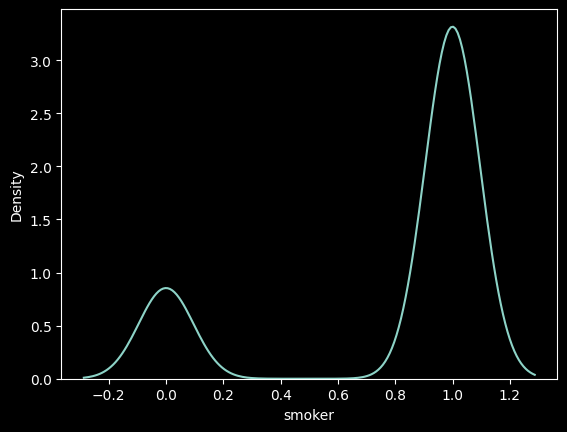

In [72]:
sns.kdeplot(df["smoker"])

* In Histplot and Kdeplot we see that as we have done label encoding and we have 2 values which actually shows the customer is Smoker or not.
* Maximum Customers donot smoke.

<Axes: xlabel='smoker', ylabel='charges'>

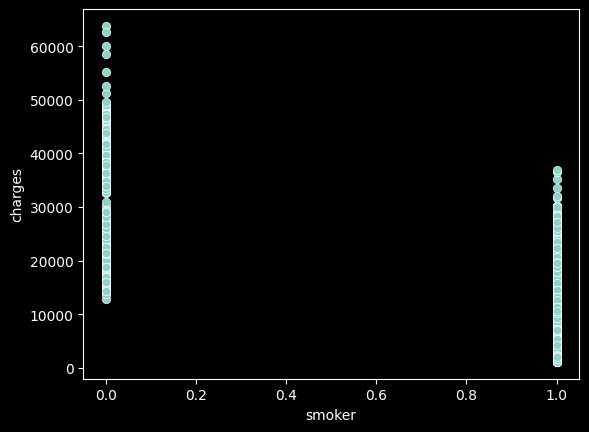

In [75]:
sns.scatterplot(x=df["smoker"],y=df["charges"]) # To check relation between smoker feature and 
                                                # target variable.

* We can see Insurance charges are highere for the cutsomers who smoke and less insurance charges are less for Non Smoker customers.

In [76]:
df["smoker"].isna().sum()  # To check for Nan Values

0

* There are no Nan Values present in smoker feature.

# Feature charges (Target variable)

<Axes: xlabel='charges', ylabel='Count'>

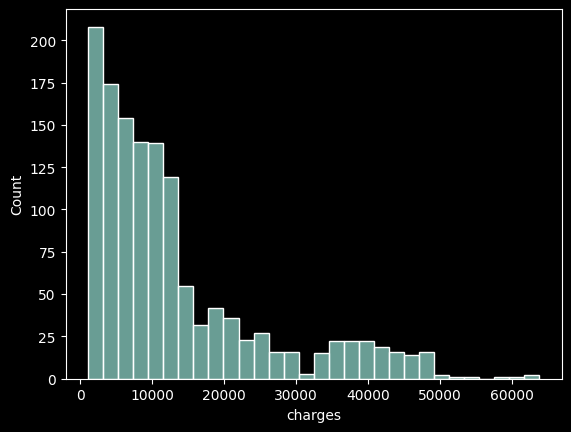

In [77]:
sns.histplot(df["charges"])

<Axes: xlabel='charges', ylabel='Density'>

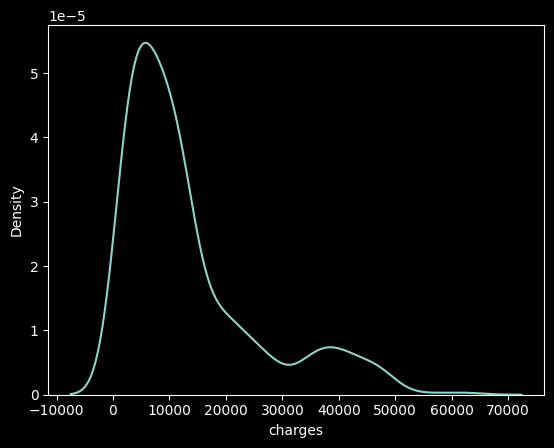

In [78]:
sns.kdeplot(df["charges"])

* In Histplot and Kdeplot we see that Maximum Customers paying insurance charges ranging from 0 to 20,000.
* Our data is Right skewed data as tail is long on the right side of the graph.


In [79]:
df["charges"].isna().sum() # To check for Nan Values

0

* No Nan Values present in charges feature.

<Axes: xlabel='charges'>

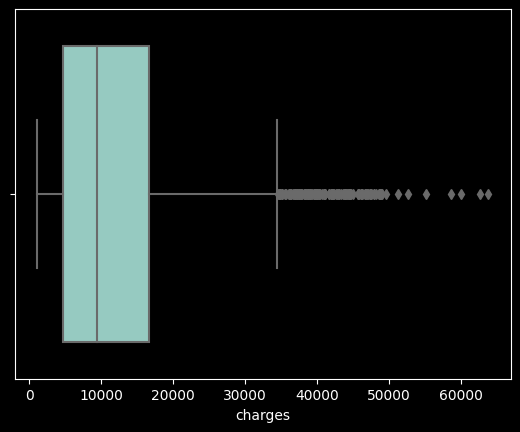

In [80]:
sns.boxplot(x=df["charges"]) # To check for outliers

<Axes: xlabel='charges'>

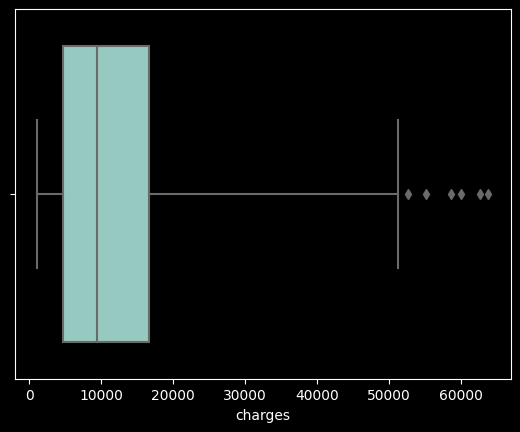

In [81]:
sns.boxplot(x=df["charges"],whis=3) # To check for extreme outliers

* In above visualization we see that in case of extreme outliers we see feew Outliers.
* Considering the Size of the dataset and with prior knowledge to Domain expert,we keep these values as it is.

In [83]:
df["charges"].isna().sum()  # To check for Nan Values

0

* No Nan Values found in feature charges.

* We have done EDA and Feature Engineering on our data.
* We have all our features in Numeric format.
* We have handled Outliers and Nan Values.
* As we have limited data we would avoid feature selection and Feature extraction techniques.
* As we have continous data in Target column we would try the assumptions of Linear regression.
* We have 2 assumptions of Linear regression before model building and 2 assumptions after model building.
* Before model building we have Linearity and No Multicolinearity.


# Assumptions of Linear regression
1. Linearity

In [85]:
y=df["charges"]
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [86]:
df.drop("charges",axis=1,inplace=True)

In [87]:
df["charges"] = y

In [88]:
df

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,19,0,27.900,0,0,0,0,0,1,16884.92400
1,18,1,33.770,1,1,0,0,1,0,1725.55230
2,28,1,33.000,3,1,0,0,1,0,4449.46200
3,33,1,22.705,0,1,0,1,0,0,21984.47061
4,32,1,28.880,0,1,0,1,0,0,3866.85520
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1,0,1,0,0,10600.54830
1334,18,0,31.920,0,1,1,0,0,0,2205.98080
1335,18,0,36.850,0,1,0,0,1,0,1629.83350
1336,21,0,25.800,0,1,0,0,0,1,2007.94500


In [89]:
df.corr()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,charges
age,1.000000,-0.020856,0.112480,0.042469,0.025019,0.002475,-0.000407,-0.011642,0.010016,0.299008
sex,-0.020856,1.000000,0.042809,0.017163,-0.076185,-0.002425,-0.011156,0.017117,-0.004184,0.057292
bmi,0.112480,0.042809,1.000000,0.008756,-0.001127,-0.132640,-0.129121,0.252464,-0.000367,0.201662
children,0.042469,0.017163,0.008756,1.000000,-0.007673,-0.022808,0.024806,-0.023066,0.021914,0.067998
smoker,0.025019,-0.076185,-0.001127,-0.007673,1.000000,-0.002811,0.036945,-0.068498,0.036945,-0.787251
region_northeast,0.002475,-0.002425,-0.132640,-0.022808,-0.002811,1.000000,-0.320177,-0.345561,-0.320177,0.006349
region_northwest,-0.000407,-0.011156,-0.129121,0.024806,0.036945,-0.320177,1.000000,-0.346265,-0.320829,-0.039905
region_southeast,-0.011642,0.017117,0.252464,-0.023066,-0.068498,-0.345561,-0.346265,1.000000,-0.346265,0.073982
region_southwest,0.010016,-0.004184,-0.000367,0.021914,0.036945,-0.320177,-0.320829,-0.346265,1.000000,-0.043210
charges,0.299008,0.057292,0.201662,0.067998,-0.787251,0.006349,-0.039905,0.073982,-0.043210,1.000000


* In above case we get value of R(Coefficient of Corelation).
* R value tells the linear relationship between the Independent variable(features) and the target variable(charges).
* R value lies within the range of -1 to +1.
* If the R value lies within +0.7 to +1 then the variables are Highly positively correlated.
* If the R value lies within +0.3 to +6 then the variables are Moderately positively correlated.
* If the R value lies within -0.3 to +3 then the variables have no correlation.
* If the R value lies within -0.3 to -6 then the variables are moderately negatively correlated.
* If the R value lies within -0.7 to -1 then the variables are Highly negatively correlated.
* In Above case we can see smoker feature is highly correlated to the target variable which means that smoker feature is contributing more in predicting the target variable(charges).

<Axes: >

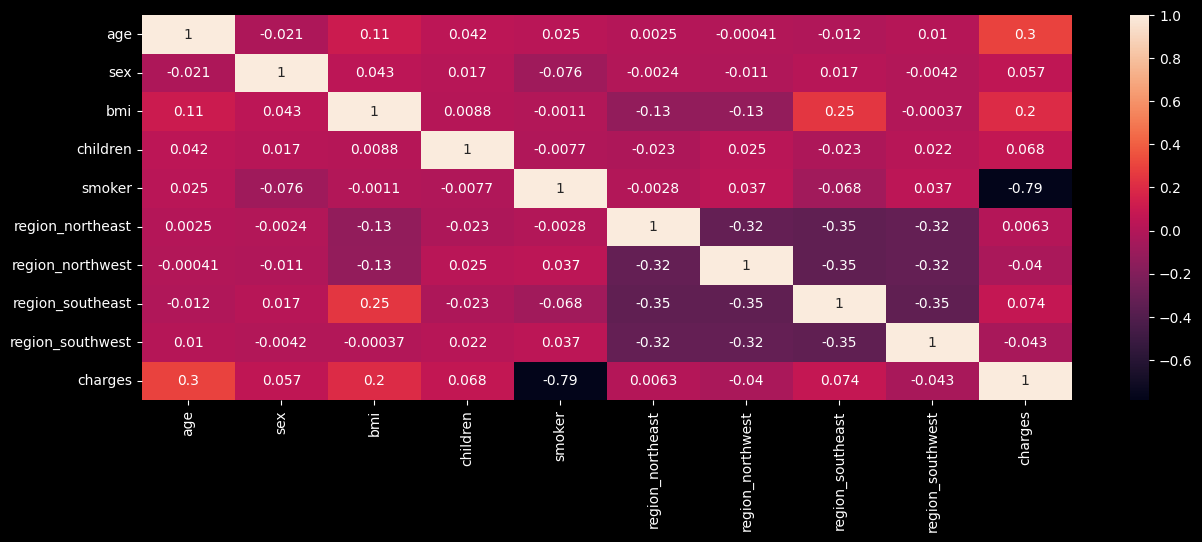

In [90]:
plt.figure(figsize=(15,5))       # Visualization 
sns.heatmap(df.corr(),annot=True)

* In above visualization we see how R value gives the linear relationship between variables.
* Linear relationship between Independent varaibles should be as low as possible.
* Linear relationship between Independent variable and Target variable should be high as possible(Highly Positive or Highly Negative).


# 2. No Multicolinearity

In [93]:
vif_list=[]
for i in range(df.shape[1]-1):
    vif=variance_inflation_factor(df.to_numpy(),i)
    print(f"VIF of {df.columns[i]} is {vif}")
    vif_list.append(vif)

VIF of age is 1.3737653309783853
VIF of sex is 1.0086946873440157
VIF of bmi is 1.2190665159722383
VIF of children is 1.0132437971216572
VIF of smoker is 3.5661195525233667
VIF of region_northeast is 11.576782960804788
VIF of region_northwest is 11.663032698963768
VIF of region_southeast is 14.667541809861024
VIF of region_southwest is 12.222335914464443


In [98]:
vif_list  # List of VIF of each feature

[1.3737653309783853,
 1.0086946873440157,
 1.2190665159722383,
 1.0132437971216572,
 3.5661195525233667,
 11.576782960804788,
 11.663032698963768,
 14.667541809861024,
 12.222335914464443]

In [95]:
x = df.drop("charges",axis=1)

<Axes: >

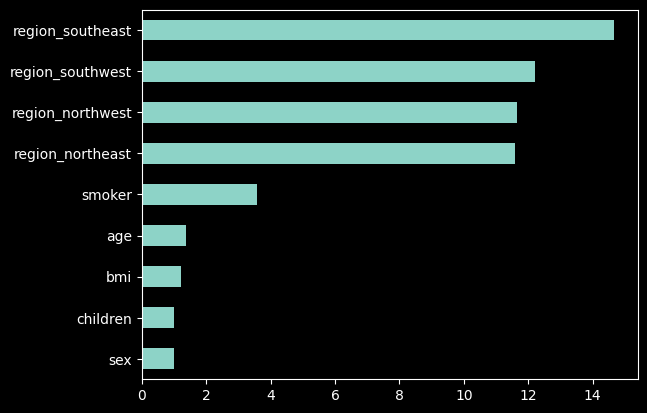

In [97]:
s1 = pd.Series(vif_list,index=x.columns)  # Plotting VIF Factor of each feature 
s1.sort_values().plot(kind="barh")

* In above plot graph we get VIF of each feature.
* VIF stands for Variance Inflation factor.
* VIF value tells us how the feature is corelated with another independent feature.
* VIF value should be as low as possible as discussed earlier.
* If VIF = 0 (No Corelation)
* If VIF in range of 1 to 5 (Low Corelation)
* If VIF in range of 5 to 10 (Moderate Corelation)
* If VIF greater than 10 (High Corelation)
* In above plot graph our score of Independent features is Moderate which is not Bad.

# Model Building 

In [101]:
x    # Independent Variables

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,0,0,0,0,1
1,18,1,33.770,1,1,0,0,1,0
2,28,1,33.000,3,1,0,0,1,0
3,33,1,22.705,0,1,0,1,0,0
4,32,1,28.880,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1,0,1,0,0
1334,18,0,31.920,0,1,1,0,0,0
1335,18,0,36.850,0,1,0,0,1,0
1336,21,0,25.800,0,1,0,0,0,1


In [102]:
y     # Target variable

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [110]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
# Splitting the data into Training and Testing sets.


In [117]:
model=LinearRegression()   # Model Instance
model.fit(x_train, y_train)

LinearRegression()

### Training Data Evaluation

In [118]:
y_predict_training=model.predict(x_train)

In [119]:
mse=mean_squared_error(y_train,y_predict_training)
print("Mean squared error:",mse)
rmse=np.sqrt(mse)
print("Root mean squared error:",rmse)
mae=mean_absolute_error(y_train,y_predict_training)
print("Mean absolute error:",mae)
r_sqaured_value=r2_score(y_train,y_predict_training)
print("R2 score:",r_sqaured_value)

Mean squared error: 37002749.518850036
Root mean squared error: 6082.988535156879
Mean absolute error: 4241.377878997237
R2 score: 0.7436304235752573


### Testing Data Evaluation 

In [120]:
y_predict_testing=model.predict(x_test)

In [121]:
mse=mean_squared_error(y_test,y_predict_testing)
print("Mean squared error:",mse)
rmse=np.sqrt(mse)
print("Root mean squared error:",rmse)
mae=mean_absolute_error(y_test,y_predict_testing)
print("Mean absolute error:",mae)
r_sqaured_value=r2_score(y_test,y_predict_testing)
print("R2 score is:",r_sqaured_value)

Mean squared error: 33620248.119789794
Root mean squared error: 5798.297001688496
Mean absolute error: 4209.08102247418
R2 score is: 0.7834426871206268


* We are getting Higher testing accuracy than Training Accuracy.
* This is a case of Underfitting.
* To avoid the case of underfitting we need more data.
* As we have limited data we will try different algorithms to avoid the case of Underfitting. 

### Lasso Regression

In [122]:
lasso_model=Lasso()
hyperparameters={"alpha":np.arange(0.01,5,0.01)}
gscv_lasso_model=GridSearchCV(lasso_model,hyperparameters,cv=5)
gscv_lasso_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0....
       4.19, 4.2 , 4.21, 4.22, 4.23, 4.24, 4.25, 4.26, 4.27, 4.28, 4.29,
       4.3 , 4.31, 4.32, 4.33, 4.34, 4.35, 4.36, 4.37, 4.38, 4.39, 4.4 ,
       4.41, 4.42, 4.43, 4.44, 4.45, 4.46, 4.47, 4.48, 4.49, 4.5 , 4.51,
       4.52, 4.53, 4.54, 4.55, 4.56, 4.57, 4.58, 4.59, 4.6 , 4.61, 4.62,
       4.63, 4.64, 4.65, 4.66, 4.67, 4.68, 4.69, 4.7 , 4.71, 4.72, 4.73,
       4.74, 4.75, 4.76, 4.77, 4.78, 4.79, 4.8 , 4.81, 4.82, 4.83, 4.84,
       4.85, 4.86, 4.87, 4.88, 4.89, 4.9 , 4.91, 4.92, 4.93, 4.94, 4.95,
       4.96, 4.97, 4.98, 4.99])})

In [123]:
gscv_lasso_model.best_estimator_

Lasso(alpha=4.99)

In [124]:
gscv_lasso_model.best_params_

{'alpha': 4.99}

In [125]:
lasso_model=Lasso(alpha=4.99)
lasso_model.fit(x_train,y_train)


Lasso(alpha=4.99)

In [126]:
y_predict_training=lasso_model.predict(x_train)

### Lasso Training data evaluation

In [127]:
mse=mean_squared_error(y_train,y_predict_training)
print("Mean squared error:",mse)
rmse=np.sqrt(mse)
print("Root mean squared error:",rmse)
mae=mean_absolute_error(y_train,y_predict_training)
print("Mean absolute error:",mae)
r_sqaured_value=r2_score(y_train,y_predict_training)
print("R2 score:",r_sqaured_value)

Mean squared error: 37003350.5143483
Root mean squared error: 6083.037934646495
Mean absolute error: 4242.452328151084
R2 score: 0.7436262596424869


In [128]:
y_predict_testing=lasso_model.predict(x_test)

### Lasso Testing data Evaluation

In [129]:
mse=mean_squared_error(y_test,y_predict_testing)
print("Mean squared error:",mse)
rmse=np.sqrt(mse)
print("Root mean squared error:",rmse)
mae=mean_absolute_error(y_test,y_predict_testing)
print("Mean absolute error:",mae)
r_sqaured_value=r2_score(y_test,y_predict_testing)
print("R2 score is:",r_sqaured_value)

Mean squared error: 33657859.40520302
Root mean squared error: 5801.53939960792
Mean absolute error: 4213.600837152604
R2 score is: 0.783200422433168


### Ridge Regression

In [130]:
ridge_model=Ridge()
hyperparameters={"alpha":np.arange(0.01,5,0.01)}
gscv_ridge_model=GridSearchCV(ridge_model,hyperparameters,cv=5)
gscv_ridge_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0....
       4.19, 4.2 , 4.21, 4.22, 4.23, 4.24, 4.25, 4.26, 4.27, 4.28, 4.29,
       4.3 , 4.31, 4.32, 4.33, 4.34, 4.35, 4.36, 4.37, 4.38, 4.39, 4.4 ,
       4.41, 4.42, 4.43, 4.44, 4.45, 4.46, 4.47, 4.48, 4.49, 4.5 , 4.51,
       4.52, 4.53, 4.54, 4.55, 4.56, 4.57, 4.58, 4.59, 4.6 , 4.61, 4.62,
       4.63, 4.64, 4.65, 4.66, 4.67, 4.68, 4.69, 4.7 , 4.71, 4.72, 4.73,
       4.74, 4.75, 4.76, 4.77, 4.78, 4.79, 4.8 , 4.81, 4.82, 4.83, 4.84,
       4.85, 4.86, 4.87, 4.88, 4.89, 4.9 , 4.91, 4.92, 4.93, 4.94, 4.95,
       4.96, 4.97, 4.98, 4.99])})

In [131]:
gscv_ridge_model.best_estimator_

Ridge(alpha=0.98)

In [132]:
gscv_ridge_model.best_params_

{'alpha': 0.98}

In [134]:
ridge_model=Ridge(alpha=0.98)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.98)

In [135]:
y_predict_training=ridge_model.predict(x_train)

### Ridge Training Data Evaluation 

In [136]:
mse=mean_squared_error(y_train,y_predict_training)
print("Mean squared error:",mse)
rmse=np.sqrt(mse)
print("Root mean squared error:",rmse)
mae=mean_absolute_error(y_train,y_predict_training)
print("Mean absolute error:",mae)
r_sqaured_value=r2_score(y_train,y_predict_training)
print("R2 score:",r_sqaured_value)

Mean squared error: 37005622.28112007
Root mean squared error: 6083.224661404514
Mean absolute error: 4250.051124912271
R2 score: 0.743610519950367


### Ridge Testing Data Evaluation

In [137]:
mse=mean_squared_error(y_test,y_predict_testing)
print("Mean squared error:",mse)
rmse=np.sqrt(mse)
print("Root mean squared error:",rmse)
mae=mean_absolute_error(y_test,y_predict_testing)
print("Mean absolute error:",mae)
r_sqaured_value=r2_score(y_test,y_predict_testing)
print("R2 score is:",r_sqaured_value)

Mean squared error: 33657859.40520302
Root mean squared error: 5801.53939960792
Mean absolute error: 4213.600837152604
R2 score is: 0.783200422433168


* In Lasso and Ridge we could not solve the issue of Underfitting.
* We will try different Algorithms

# KNN Regressor 

In [138]:
# Importing Libraries
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [139]:
knn_regressor = KNeighborsRegressor()
knn_regressor.fit(x_train,y_train)

KNeighborsRegressor()

In [140]:
y_predict_training = knn_regressor.predict(x_train)


### KNN Regressor Training data evaluation 

In [141]:
mse=mean_squared_error(y_train,y_predict_training)
print("Mean squared error:",mse)
rmse=np.sqrt(mse)
print("Root mean squared error:",rmse)
mae=mean_absolute_error(y_train,y_predict_training)
print("Mean absolute error:",mae)
r_sqaured_value=r2_score(y_train,y_predict_training)
print("R2 score:",r_sqaured_value)

Mean squared error: 79513487.1817776
Root mean squared error: 8917.03354158644
Mean absolute error: 6058.29196406729
R2 score: 0.4490993427809459


In [142]:
y_predict_testing = knn_regressor.predict(x_test)

### KNN Regressor Testing data Evaluation 

In [143]:
mse=mean_squared_error(y_test,y_predict_testing)
print("Mean squared error:",mse)
rmse=np.sqrt(mse)
print("Root mean squared error:",rmse)
mae=mean_absolute_error(y_test,y_predict_testing)
print("Mean absolute error:",mae)
r_sqaured_value=r2_score(y_test,y_predict_testing)
print("R2 score is:",r_sqaured_value)

Mean squared error: 128198904.71314685
Root mean squared error: 11322.495516146026
Mean absolute error: 7687.759320578358
R2 score is: 0.17423541254544805


### Hyperparameter tuning of KNN Regressor

In [144]:
knn_regressor = KNeighborsRegressor()
hyperparameter = {"n_neighbors" : np.arange(3,30),
                 "p" : [1,2]}
gscv_knn_regressor = GridSearchCV(knn_regressor,hyperparameter,cv=5)
gscv_knn_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'p': [1, 2]})

In [145]:
gscv_knn_regressor.best_estimator_

KNeighborsRegressor(p=1)

In [146]:
gscv_knn_regressor.best_params_

{'n_neighbors': 5, 'p': 1}

In [147]:
knn_regressor = gscv_knn_regressor.best_estimator_
knn_regressor.fit(x_train,y_train)

KNeighborsRegressor(p=1)

In [148]:
y_predict_training = knn_regressor.predict(x_train)

### Training data evaluation after Hyperparameter tuning

In [149]:
mse=mean_squared_error(y_train,y_predict_training)
print("Mean squared error:",mse)
rmse=np.sqrt(mse)
print("Root mean squared error:",rmse)
mae=mean_absolute_error(y_train,y_predict_training)
print("Mean absolute error:",mae)
r_sqaured_value=r2_score(y_train,y_predict_training)
print("R2 score:",r_sqaured_value)

Mean squared error: 67129587.20688112
Root mean squared error: 8193.264746539142
Mean absolute error: 5348.411551573832
R2 score: 0.534899863886364


In [150]:
y_predict_testing = knn_regressor.predict(x_test)

### Testing Data Evaluation after Hyerparameter tuning 

In [151]:
mse=mean_squared_error(y_test,y_predict_testing)
print("Mean squared error:",mse)
rmse=np.sqrt(mse)
print("Root mean squared error:",rmse)
mae=mean_absolute_error(y_test,y_predict_testing)
print("Mean absolute error:",mae)
r_sqaured_value=r2_score(y_test,y_predict_testing)
print("R2 score is:",r_sqaured_value)

Mean squared error: 97664315.78871356
Root mean squared error: 9882.525779815278
Mean absolute error: 6283.882586041045
R2 score is: 0.3709171414782947


* We will try decision tree 

# Decision Tree Regressor

In [152]:
# Impporting Libraries
from sklearn.tree import DecisionTreeRegressor


In [154]:
dt_regressor = DecisionTreeRegressor()  # Model Instance 
dt_regressor.fit(x_train,y_train)

DecisionTreeRegressor()

In [155]:
y_predict_training = dt_regressor.predict(x_train)

### Training data evaluation of Decision Tree Regressor

In [156]:
mse=mean_squared_error(y_train,y_predict_training)
print("Mean squared error:",mse)
rmse=np.sqrt(mse)
print("Root mean squared error:",rmse)
mae=mean_absolute_error(y_train,y_predict_training)
print("Mean absolute error:",mae)
r_sqaured_value=r2_score(y_train,y_predict_training)
print("R2 score:",r_sqaured_value)

Mean squared error: 283300.0846030885
Root mean squared error: 532.2594147622834
Mean absolute error: 38.13592156386292
R2 score: 0.9980371857865916


### Testing Data Evaluation of Decision Tree Regressor

In [157]:
y_predict_testing = dt_regressor.predict(x_test)

In [158]:
mse=mean_squared_error(y_test,y_predict_testing)
print("Mean squared error:",mse)
rmse=np.sqrt(mse)
print("Root mean squared error:",rmse)
mae=mean_absolute_error(y_test,y_predict_testing)
print("Mean absolute error:",mae)
r_sqaured_value=r2_score(y_test,y_predict_testing)
print("R2 score is:",r_sqaured_value)

Mean squared error: 42669159.08750936
Root mean squared error: 6532.163430863419
Mean absolute error: 3170.941319809702
R2 score is: 0.7251561498924688


* We have avoided the issue for Underfitting but come up with the issue of Overfitting which is common in Decision Tree Regressor.
* We will try Hyperparameter tuning and see if the result changes

### Hyperparameter tuning of Decision Tree Regressor

In [160]:
dt_regressor = DecisionTreeRegressor()
hyperparameter = {"criterion" :["squared_error","absolute_error"],
                 'max_depth': np.arange(3,8),
                 "min_samples_split" :np.arange(2,20),
                 "min_samples_leaf":np.arange(2,15)}
gscv_dt_regressor = GridSearchCV(dt_regressor,hyperparameter,cv=5)
gscv_dt_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': array([3, 4, 5, 6, 7]),
                         'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [161]:
gscv_dt_regressor.best_estimator_

DecisionTreeRegressor(criterion='absolute_error', max_depth=6,
                      min_samples_leaf=6)

In [162]:
gscv_dt_regressor.best_params_

{'criterion': 'absolute_error',
 'max_depth': 6,
 'min_samples_leaf': 6,
 'min_samples_split': 2}

In [164]:
dt_regressor = gscv_dt_regressor.best_estimator_
dt_regressor.fit(x_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=6,
                      min_samples_leaf=6)

### TRaining Data Evaluation after hyperparameter tuning in Decision Tree Model

In [165]:
y_predict_training = dt_regressor.predict(x_train)
mse=mean_squared_error(y_train,y_predict_training)
print("Mean squared error:",mse)
rmse=np.sqrt(mse)
print("Root mean squared error:",rmse)
mae=mean_absolute_error(y_train,y_predict_training)
print("Mean absolute error:",mae)
r_sqaured_value=r2_score(y_train,y_predict_training)
print("R2 score:",r_sqaured_value)

Mean squared error: 20900976.52145333
Root mean squared error: 4571.758580836627
Mean absolute error: 1709.066924261682
R2 score: 0.8551898286656022


### Testing Data Evaluation after Hyperparameter tuning in Decision tree regressor

In [166]:
y_predict_testing = dt_regressor.predict(x_test)
mse=mean_squared_error(y_test,y_predict_testing)
print("Mean squared error:",mse)
rmse=np.sqrt(mse)
print("Root mean squared error:",rmse)
mae=mean_absolute_error(y_test,y_predict_testing)
print("Mean absolute error:",mae)
r_sqaured_value=r2_score(y_test,y_predict_testing)
print("R2 score is:",r_sqaured_value)

Mean squared error: 19695811.058824655
Root mean squared error: 4437.996288734889
Mean absolute error: 1693.1863360037314
R2 score is: 0.8731338358157965


* We still have minor Underfiiting.
* We will try Random Forest Regressor

# Random Forest Regressor

In [167]:
# Importing Libraries 
from sklearn.ensemble import RandomForestRegressor


In [168]:
rf_model = RandomForestRegressor()
rf_model.fit(x_train,y_train)

RandomForestRegressor()

### Training Data evaluation on Random Forest Regressor

In [169]:
y_predict_training = rf_model.predict(x_train)
mse=mean_squared_error(y_train,y_predict_training)
print("Mean squared error:",mse)
rmse=np.sqrt(mse)
print("Root mean squared error:",rmse)
mae=mean_absolute_error(y_train,y_predict_training)
print("Mean absolute error:",mae)
r_sqaured_value=r2_score(y_train,y_predict_training)
print("R2 score:",r_sqaured_value)

Mean squared error: 3591694.1217462854
Root mean squared error: 1895.1765410500113
Mean absolute error: 1045.8699993012792
R2 score: 0.9751153329789654


### Testing data Evaluation on Random Forest Regressor 

In [170]:
y_predict_testing = rf_model.predict(x_test)
mse=mean_squared_error(y_test,y_predict_testing)
print("Mean squared error:",mse)
rmse=np.sqrt(mse)
print("Root mean squared error:",rmse)
mae=mean_absolute_error(y_test,y_predict_testing)
print("Mean absolute error:",mae)
r_sqaured_value=r2_score(y_test,y_predict_testing)
print("R2 score is:",r_sqaured_value)

Mean squared error: 21169005.435318545
Root mean squared error: 4600.978747540413
Mean absolute error: 2528.379913550296
R2 score is: 0.8636445835537131


* We have avoided the issue of Underfitting.
* Model tends to be bit Overfitted.
* We will try Hyperparameter tuning to avoid this issue.

### Hyperparameter tuning of Random Forest Regressor

In [171]:
rf_model = RandomForestRegressor()
hyperparameter = {"n_estimators" :np.arange(10,200),
                 "criterion":["squared_error","absolute_error"],
                    "max_depth" : np.arange(3,8),
                    "min_samples_split": np.arange(4,20),
                    "min_samples_leaf" : np.arange(3,10),
                    "max_features":[7],
                  "random_state" : [11],
                  "oob_score" : [True],
                   "verbose" : [2]
                   }
rscv_rf_model = RandomizedSearchCV(rf_model,hyperparameter,cv=5)
rscv_rf_model.fit(x_train,y_train)

building tree 1 of 174
building tree 2 of 174
building tree 3 of 174
building tree 4 of 174
building tree 5 of 174
building tree 6 of 174
building tree 7 of 174
building tree 8 of 174
building tree 9 of 174
building tree 10 of 174
building tree 11 of 174
building tree 12 of 174
building tree 13 of 174
building tree 14 of 174
building tree 15 of 174
building tree 16 of 174
building tree 17 of 174
building tree 18 of 174
building tree 19 of 174
building tree 20 of 174
building tree 21 of 174
building tree 22 of 174
building tree 23 of 174
building tree 24 of 174
building tree 25 of 174
building tree 26 of 174
building tree 27 of 174
building tree 28 of 174
building tree 29 of 174
building tree 30 of 174
building tree 31 of 174
building tree 32 of 174
building tree 33 of 174
building tree 34 of 174
building tree 35 of 174
building tree 36 of 174
building tree 37 of 174
building tree 38 of 174
building tree 39 of 174
building tree 40 of 174
building tree 41 of 174
building tree 42 of 174
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.7s


building tree 44 of 174
building tree 45 of 174
building tree 46 of 174
building tree 47 of 174
building tree 48 of 174
building tree 49 of 174
building tree 50 of 174
building tree 51 of 174
building tree 52 of 174
building tree 53 of 174
building tree 54 of 174
building tree 55 of 174
building tree 56 of 174
building tree 57 of 174
building tree 58 of 174
building tree 59 of 174
building tree 60 of 174
building tree 61 of 174
building tree 62 of 174
building tree 63 of 174
building tree 64 of 174
building tree 65 of 174
building tree 66 of 174
building tree 67 of 174
building tree 68 of 174
building tree 69 of 174
building tree 70 of 174
building tree 71 of 174
building tree 72 of 174
building tree 73 of 174
building tree 74 of 174
building tree 75 of 174
building tree 76 of 174
building tree 77 of 174
building tree 78 of 174
building tree 79 of 174
building tree 80 of 174
building tree 81 of 174
building tree 82 of 174
building tree 83 of 174
building tree 84 of 174
building tree 85

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    3.3s


building tree 169 of 174
building tree 170 of 174
building tree 171 of 174
building tree 172 of 174
building tree 173 of 174
building tree 174 of 174


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 1 of 174
building tree 2 of 174
building tree 3 of 174
building tree 4 of 174
building tree 5 of 174
building tree 6 of 174
building tree 7 of 174
building tree 8 of 174
building tree 9 of 174
building tree 10 of 174
building tree 11 of 174
building tree 12 of 174
building tree 13 of 174
building tree 14 of 174
building tree 15 of 174
building tree 16 of 174
building tree 17 of 174
building tree 18 of 174
building tree 19 of 174
building tree 20 of 174
building tree 21 of 174
building tree 22 of 174
building tree 23 of 174
building tree 24 of 174
building tree 25 of 174
building tree 26 of 174
building tree 27 of 174
building tree 28 of 174
building tree 29 of 174
building tree 30 of 174
building tree 31 of 174
building tree 32 of 174
building tree 33 of 174
building tree 34 of 174
building tree 35 of 174
building tree 36 of 174
building tree 37 of 174
building tree 38 of 174
building tree 39 of 174
building tree 40 of 174
building tree 41 of 174
building tree 42 of 174


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.7s


building tree 43 of 174
building tree 44 of 174
building tree 45 of 174
building tree 46 of 174
building tree 47 of 174
building tree 48 of 174
building tree 49 of 174
building tree 50 of 174
building tree 51 of 174
building tree 52 of 174
building tree 53 of 174
building tree 54 of 174
building tree 55 of 174
building tree 56 of 174
building tree 57 of 174
building tree 58 of 174
building tree 59 of 174
building tree 60 of 174
building tree 61 of 174
building tree 62 of 174
building tree 63 of 174
building tree 64 of 174
building tree 65 of 174
building tree 66 of 174
building tree 67 of 174
building tree 68 of 174
building tree 69 of 174
building tree 70 of 174
building tree 71 of 174
building tree 72 of 174
building tree 73 of 174
building tree 74 of 174
building tree 75 of 174
building tree 76 of 174
building tree 77 of 174
building tree 78 of 174
building tree 79 of 174
building tree 80 of 174
building tree 81 of 174
building tree 82 of 174
building tree 83 of 174
building tree 84

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    3.2s


building tree 163 of 174
building tree 164 of 174
building tree 165 of 174
building tree 166 of 174
building tree 167 of 174
building tree 168 of 174
building tree 169 of 174
building tree 170 of 174
building tree 171 of 174
building tree 172 of 174
building tree 173 of 174
building tree 174 of 174


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 1 of 174
building tree 2 of 174
building tree 3 of 174
building tree 4 of 174
building tree 5 of 174
building tree 6 of 174
building tree 7 of 174
building tree 8 of 174
building tree 9 of 174
building tree 10 of 174
building tree 11 of 174
building tree 12 of 174
building tree 13 of 174
building tree 14 of 174
building tree 15 of 174
building tree 16 of 174
building tree 17 of 174
building tree 18 of 174
building tree 19 of 174
building tree 20 of 174
building tree 21 of 174
building tree 22 of 174
building tree 23 of 174
building tree 24 of 174
building tree 25 of 174
building tree 26 of 174
building tree 27 of 174
building tree 28 of 174
building tree 29 of 174
building tree 30 of 174
building tree 31 of 174
building tree 32 of 174
building tree 33 of 174
building tree 34 of 174
building tree 35 of 174
building tree 36 of 174
building tree 37 of 174
building tree 38 of 174
building tree 39 of 174
building tree 40 of 174
building tree 41 of 174
building tree 42 of 174
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.7s


building tree 44 of 174
building tree 45 of 174
building tree 46 of 174
building tree 47 of 174
building tree 48 of 174
building tree 49 of 174
building tree 50 of 174
building tree 51 of 174
building tree 52 of 174
building tree 53 of 174
building tree 54 of 174
building tree 55 of 174
building tree 56 of 174
building tree 57 of 174
building tree 58 of 174
building tree 59 of 174
building tree 60 of 174
building tree 61 of 174
building tree 62 of 174
building tree 63 of 174
building tree 64 of 174
building tree 65 of 174
building tree 66 of 174
building tree 67 of 174
building tree 68 of 174
building tree 69 of 174
building tree 70 of 174
building tree 71 of 174
building tree 72 of 174
building tree 73 of 174
building tree 74 of 174
building tree 75 of 174
building tree 76 of 174
building tree 77 of 174
building tree 78 of 174
building tree 79 of 174
building tree 80 of 174
building tree 81 of 174
building tree 82 of 174
building tree 83 of 174
building tree 84 of 174
building tree 85

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    3.2s


building tree 173 of 174
building tree 174 of 174


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 1 of 174
building tree 2 of 174
building tree 3 of 174
building tree 4 of 174
building tree 5 of 174
building tree 6 of 174
building tree 7 of 174
building tree 8 of 174
building tree 9 of 174
building tree 10 of 174
building tree 11 of 174
building tree 12 of 174
building tree 13 of 174
building tree 14 of 174
building tree 15 of 174
building tree 16 of 174
building tree 17 of 174
building tree 18 of 174
building tree 19 of 174
building tree 20 of 174
building tree 21 of 174
building tree 22 of 174
building tree 23 of 174
building tree 24 of 174
building tree 25 of 174
building tree 26 of 174
building tree 27 of 174
building tree 28 of 174
building tree 29 of 174
building tree 30 of 174
building tree 31 of 174
building tree 32 of 174
building tree 33 of 174
building tree 34 of 174
building tree 35 of 174
building tree 36 of 174
building tree 37 of 174
building tree 38 of 174
building tree 39 of 174
building tree 40 of 174
building tree 41 of 174
building tree 42 of 174
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.7s


building tree 47 of 174
building tree 48 of 174
building tree 49 of 174
building tree 50 of 174
building tree 51 of 174
building tree 52 of 174
building tree 53 of 174
building tree 54 of 174
building tree 55 of 174
building tree 56 of 174
building tree 57 of 174
building tree 58 of 174
building tree 59 of 174
building tree 60 of 174
building tree 61 of 174
building tree 62 of 174
building tree 63 of 174
building tree 64 of 174
building tree 65 of 174
building tree 66 of 174
building tree 67 of 174
building tree 68 of 174
building tree 69 of 174
building tree 70 of 174
building tree 71 of 174
building tree 72 of 174
building tree 73 of 174
building tree 74 of 174
building tree 75 of 174
building tree 76 of 174
building tree 77 of 174
building tree 78 of 174
building tree 79 of 174
building tree 80 of 174
building tree 81 of 174
building tree 82 of 174
building tree 83 of 174
building tree 84 of 174
building tree 85 of 174
building tree 86 of 174
building tree 87 of 174
building tree 88

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    3.3s


building tree 172 of 174
building tree 173 of 174
building tree 174 of 174


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 1 of 174
building tree 2 of 174
building tree 3 of 174
building tree 4 of 174
building tree 5 of 174
building tree 6 of 174
building tree 7 of 174
building tree 8 of 174
building tree 9 of 174
building tree 10 of 174
building tree 11 of 174
building tree 12 of 174
building tree 13 of 174
building tree 14 of 174
building tree 15 of 174
building tree 16 of 174
building tree 17 of 174
building tree 18 of 174
building tree 19 of 174
building tree 20 of 174
building tree 21 of 174
building tree 22 of 174
building tree 23 of 174
building tree 24 of 174
building tree 25 of 174
building tree 26 of 174
building tree 27 of 174
building tree 28 of 174
building tree 29 of 174
building tree 30 of 174
building tree 31 of 174
building tree 32 of 174
building tree 33 of 174
building tree 34 of 174
building tree 35 of 174
building tree 36 of 174
building tree 37 of 174
building tree 38 of 174
building tree 39 of 174
building tree 40 of 174
building tree 41 of 174
building tree 42 of 174
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.7s


building tree 46 of 174
building tree 47 of 174
building tree 48 of 174
building tree 49 of 174
building tree 50 of 174
building tree 51 of 174
building tree 52 of 174
building tree 53 of 174
building tree 54 of 174
building tree 55 of 174
building tree 56 of 174
building tree 57 of 174
building tree 58 of 174
building tree 59 of 174
building tree 60 of 174
building tree 61 of 174
building tree 62 of 174
building tree 63 of 174
building tree 64 of 174
building tree 65 of 174
building tree 66 of 174
building tree 67 of 174
building tree 68 of 174
building tree 69 of 174
building tree 70 of 174
building tree 71 of 174
building tree 72 of 174
building tree 73 of 174
building tree 74 of 174
building tree 75 of 174
building tree 76 of 174
building tree 77 of 174
building tree 78 of 174
building tree 79 of 174
building tree 80 of 174
building tree 81 of 174
building tree 82 of 174
building tree 83 of 174
building tree 84 of 174
building tree 85 of 174
building tree 86 of 174
building tree 87

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    3.1s


building tree 167 of 174
building tree 168 of 174
building tree 169 of 174
building tree 170 of 174
building tree 171 of 174
building tree 172 of 174
building tree 173 of 174
building tree 174 of 174


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 1 of 166
building tree 2 of 166
building tree 3 of 166
building tree 4 of 166
building tree 5 of 166
building tree 6 of 166
building tree 7 of 166
building tree 8 of 166
building tree 9 of 166
building tree 10 of 166
building tree 11 of 166
building tree 12 of 166
building tree 13 of 166
building tree 14 of 166
building tree 15 of 166
building tree 16 of 166
building tree 17 of 166
building tree 18 of 166
building tree 19 of 166
building tree 20 of 166
building tree 21 of 166
building tree 22 of 166
building tree 23 of 166
building tree 24 of 166
building tree 25 of 166
building tree 26 of 166
building tree 27 of 166
building tree 28 of 166
building tree 29 of 166
building tree 30 of 166
building tree 31 of 166
building tree 32 of 166
building tree 33 of 166
building tree 34 of 166
building tree 35 of 166
building tree 36 of 166
building tree 37 of 166
building tree 38 of 166
building tree 39 of 166
building tree 40 of 166
building tree 41 of 166
building tree 42 of 166
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 67 of 166
building tree 68 of 166
building tree 69 of 166
building tree 70 of 166
building tree 71 of 166
building tree 72 of 166
building tree 73 of 166
building tree 74 of 166
building tree 75 of 166
building tree 76 of 166
building tree 77 of 166
building tree 78 of 166
building tree 79 of 166
building tree 80 of 166
building tree 81 of 166
building tree 82 of 166
building tree 83 of 166
building tree 84 of 166
building tree 85 of 166
building tree 86 of 166
building tree 87 of 166
building tree 88 of 166
building tree 89 of 166
building tree 90 of 166
building tree 91 of 166
building tree 92 of 166
building tree 93 of 166
building tree 94 of 166
building tree 95 of 166
building tree 96 of 166
building tree 97 of 166
building tree 98 of 166
building tree 99 of 166
building tree 100 of 166
building tree 101 of 166
building tree 102 of 166
building tree 103 of 166
building tree 104 of 166
building tree 105 of 166
building tree 106 of 166
building tree 107 of 166
building

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 1 of 166
building tree 2 of 166
building tree 3 of 166
building tree 4 of 166
building tree 5 of 166
building tree 6 of 166
building tree 7 of 166
building tree 8 of 166
building tree 9 of 166
building tree 10 of 166
building tree 11 of 166
building tree 12 of 166
building tree 13 of 166
building tree 14 of 166
building tree 15 of 166
building tree 16 of 166
building tree 17 of 166
building tree 18 of 166
building tree 19 of 166
building tree 20 of 166
building tree 21 of 166
building tree 22 of 166
building tree 23 of 166
building tree 24 of 166
building tree 25 of 166
building tree 26 of 166
building tree 27 of 166
building tree 28 of 166
building tree 29 of 166
building tree 30 of 166
building tree 31 of 166
building tree 32 of 166
building tree 33 of 166
building tree 34 of 166
building tree 35 of 166
building tree 36 of 166
building tree 37 of 166
building tree 38 of 166
building tree 39 of 166
building tree 40 of 166
building tree 41 of 166
building tree 42 of 166
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 67 of 166
building tree 68 of 166
building tree 69 of 166
building tree 70 of 166
building tree 71 of 166
building tree 72 of 166
building tree 73 of 166
building tree 74 of 166
building tree 75 of 166
building tree 76 of 166
building tree 77 of 166
building tree 78 of 166
building tree 79 of 166
building tree 80 of 166
building tree 81 of 166
building tree 82 of 166
building tree 83 of 166
building tree 84 of 166
building tree 85 of 166
building tree 86 of 166
building tree 87 of 166
building tree 88 of 166
building tree 89 of 166
building tree 90 of 166
building tree 91 of 166
building tree 92 of 166
building tree 93 of 166
building tree 94 of 166
building tree 95 of 166
building tree 96 of 166
building tree 97 of 166
building tree 98 of 166
building tree 99 of 166
building tree 100 of 166
building tree 101 of 166
building tree 102 of 166
building tree 103 of 166
building tree 104 of 166
building tree 105 of 166
building tree 106 of 166
building tree 107 of 166
building

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 1 of 166
building tree 2 of 166
building tree 3 of 166
building tree 4 of 166
building tree 5 of 166
building tree 6 of 166
building tree 7 of 166
building tree 8 of 166
building tree 9 of 166
building tree 10 of 166
building tree 11 of 166
building tree 12 of 166
building tree 13 of 166
building tree 14 of 166
building tree 15 of 166
building tree 16 of 166
building tree 17 of 166
building tree 18 of 166
building tree 19 of 166
building tree 20 of 166
building tree 21 of 166
building tree 22 of 166
building tree 23 of 166
building tree 24 of 166
building tree 25 of 166
building tree 26 of 166
building tree 27 of 166
building tree 28 of 166
building tree 29 of 166
building tree 30 of 166
building tree 31 of 166
building tree 32 of 166
building tree 33 of 166
building tree 34 of 166
building tree 35 of 166
building tree 36 of 166
building tree 37 of 166
building tree 38 of 166
building tree 39 of 166
building tree 40 of 166
building tree 41 of 166
building tree 42 of 166
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 73 of 166
building tree 74 of 166
building tree 75 of 166
building tree 76 of 166
building tree 77 of 166
building tree 78 of 166
building tree 79 of 166
building tree 80 of 166
building tree 81 of 166
building tree 82 of 166
building tree 83 of 166
building tree 84 of 166
building tree 85 of 166
building tree 86 of 166
building tree 87 of 166
building tree 88 of 166
building tree 89 of 166
building tree 90 of 166
building tree 91 of 166
building tree 92 of 166
building tree 93 of 166
building tree 94 of 166
building tree 95 of 166
building tree 96 of 166
building tree 97 of 166
building tree 98 of 166
building tree 99 of 166
building tree 100 of 166
building tree 101 of 166
building tree 102 of 166
building tree 103 of 166
building tree 104 of 166
building tree 105 of 166
building tree 106 of 166
building tree 107 of 166
building tree 108 of 166
building tree 109 of 166
building tree 110 of 166
building tree 111 of 166
building tree 112 of 166
building tree 113 of 166
bu

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 1 of 166
building tree 2 of 166
building tree 3 of 166
building tree 4 of 166
building tree 5 of 166
building tree 6 of 166
building tree 7 of 166
building tree 8 of 166
building tree 9 of 166
building tree 10 of 166
building tree 11 of 166
building tree 12 of 166
building tree 13 of 166
building tree 14 of 166
building tree 15 of 166
building tree 16 of 166
building tree 17 of 166
building tree 18 of 166
building tree 19 of 166
building tree 20 of 166
building tree 21 of 166
building tree 22 of 166
building tree 23 of 166
building tree 24 of 166
building tree 25 of 166
building tree 26 of 166
building tree 27 of 166
building tree 28 of 166
building tree 29 of 166
building tree 30 of 166
building tree 31 of 166
building tree 32 of 166
building tree 33 of 166
building tree 34 of 166
building tree 35 of 166
building tree 36 of 166
building tree 37 of 166
building tree 38 of 166
building tree 39 of 166
building tree 40 of 166
building tree 41 of 166
building tree 42 of 166
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 67 of 166
building tree 68 of 166
building tree 69 of 166
building tree 70 of 166
building tree 71 of 166
building tree 72 of 166
building tree 73 of 166
building tree 74 of 166
building tree 75 of 166
building tree 76 of 166
building tree 77 of 166
building tree 78 of 166
building tree 79 of 166
building tree 80 of 166
building tree 81 of 166
building tree 82 of 166
building tree 83 of 166
building tree 84 of 166
building tree 85 of 166
building tree 86 of 166
building tree 87 of 166
building tree 88 of 166
building tree 89 of 166
building tree 90 of 166
building tree 91 of 166
building tree 92 of 166
building tree 93 of 166
building tree 94 of 166
building tree 95 of 166
building tree 96 of 166
building tree 97 of 166
building tree 98 of 166
building tree 99 of 166
building tree 100 of 166
building tree 101 of 166
building tree 102 of 166
building tree 103 of 166
building tree 104 of 166
building tree 105 of 166
building tree 106 of 166
building tree 107 of 166
building

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 1 of 166
building tree 2 of 166
building tree 3 of 166
building tree 4 of 166
building tree 5 of 166
building tree 6 of 166
building tree 7 of 166
building tree 8 of 166
building tree 9 of 166
building tree 10 of 166
building tree 11 of 166
building tree 12 of 166
building tree 13 of 166
building tree 14 of 166
building tree 15 of 166
building tree 16 of 166
building tree 17 of 166
building tree 18 of 166
building tree 19 of 166
building tree 20 of 166
building tree 21 of 166
building tree 22 of 166
building tree 23 of 166
building tree 24 of 166
building tree 25 of 166
building tree 26 of 166
building tree 27 of 166
building tree 28 of 166
building tree 29 of 166
building tree 30 of 166
building tree 31 of 166
building tree 32 of 166
building tree 33 of 166
building tree 34 of 166
building tree 35 of 166
building tree 36 of 166
building tree 37 of 166
building tree 38 of 166
building tree 39 of 166
building tree 40 of 166
building tree 41 of 166
building tree 42 of 166
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 78 of 166
building tree 79 of 166
building tree 80 of 166
building tree 81 of 166
building tree 82 of 166
building tree 83 of 166
building tree 84 of 166
building tree 85 of 166
building tree 86 of 166
building tree 87 of 166
building tree 88 of 166
building tree 89 of 166
building tree 90 of 166
building tree 91 of 166
building tree 92 of 166
building tree 93 of 166
building tree 94 of 166
building tree 95 of 166
building tree 96 of 166
building tree 97 of 166
building tree 98 of 166
building tree 99 of 166
building tree 100 of 166
building tree 101 of 166
building tree 102 of 166
building tree 103 of 166
building tree 104 of 166
building tree 105 of 166
building tree 106 of 166
building tree 107 of 166
building tree 108 of 166
building tree 109 of 166
building tree 110 of 166
building tree 111 of 166
building tree 112 of 166
building tree 113 of 166
building tree 114 of 166
building tree 115 of 166
building tree 116 of 166
building tree 117 of 166
building tree 118 of 1

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 6 of 13
building tree 7 of 13
building tree 8 of 13
building tree 9 of 13
building tree 10 of 13
building tree 11 of 13
building tree 12 of 13
building tree 13 of 13
building tree 1 of 13
building tree 2 of 13
building tree 3 of 13
building tree 4 of 13
building tree 5 of 13
building tree 6 of 13
building tree 7 of 13
building tree 8 of 13
building tree 9 of 13
building tree 10 of 13
building tree 11 of 13
building tree 12 of 13
building tree 13 of 13
building tree 1 of 13
building tree 2 of 13
building tree 3 of 13
building tree 4 of 13
building tree 5 of 13
building tree 6 of 13
building tree 7 of 13
building tree 8 of 13
building tree 9 of 13
building tree 10 of 13
building tree 11 of 13
building tree 12 of 13
building tree 13 of 13
building tree 1 of 13
building tree 2 of 13
building tree 3 of 13
building tree 4 of 13
building tree 5 of 13
building tree 6 of 13
building tree 7 of 13
building tree 8 of 13
building tree 9 of 13
building tree 10 of 13
building tree 11 of

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.5s


building tree 42 of 134
building tree 43 of 134
building tree 44 of 134
building tree 45 of 134
building tree 46 of 134
building tree 47 of 134
building tree 48 of 134
building tree 49 of 134
building tree 50 of 134
building tree 51 of 134
building tree 52 of 134
building tree 53 of 134
building tree 54 of 134
building tree 55 of 134
building tree 56 of 134
building tree 57 of 134
building tree 58 of 134
building tree 59 of 134
building tree 60 of 134
building tree 61 of 134
building tree 62 of 134
building tree 63 of 134
building tree 64 of 134
building tree 65 of 134
building tree 66 of 134
building tree 67 of 134
building tree 68 of 134
building tree 69 of 134
building tree 70 of 134
building tree 71 of 134
building tree 72 of 134
building tree 73 of 134
building tree 74 of 134
building tree 75 of 134
building tree 76 of 134
building tree 77 of 134
building tree 78 of 134
building tree 79 of 134
building tree 80 of 134
building tree 81 of 134
building tree 82 of 134
building tree 83

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 134
building tree 2 of 134
building tree 3 of 134
building tree 4 of 134
building tree 5 of 134
building tree 6 of 134
building tree 7 of 134
building tree 8 of 134
building tree 9 of 134
building tree 10 of 134
building tree 11 of 134
building tree 12 of 134
building tree 13 of 134
building tree 14 of 134
building tree 15 of 134
building tree 16 of 134
building tree 17 of 134
building tree 18 of 134
building tree 19 of 134
building tree 20 of 134
building tree 21 of 134
building tree 22 of 134
building tree 23 of 134
building tree 24 of 134
building tree 25 of 134
building tree 26 of 134
building tree 27 of 134
building tree 28 of 134
building tree 29 of 134
building tree 30 of 134
building tree 31 of 134
building tree 32 of 134
building tree 33 of 134
building tree 34 of 134
building tree 35 of 134
building tree 36 of 134
building tree 37 of 134
building tree 38 of 134
building tree 39 of 134
building tree 40 of 134
building tree 41 of 134


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.5s


building tree 42 of 134
building tree 43 of 134
building tree 44 of 134
building tree 45 of 134
building tree 46 of 134
building tree 47 of 134
building tree 48 of 134
building tree 49 of 134
building tree 50 of 134
building tree 51 of 134
building tree 52 of 134
building tree 53 of 134
building tree 54 of 134
building tree 55 of 134
building tree 56 of 134
building tree 57 of 134
building tree 58 of 134
building tree 59 of 134
building tree 60 of 134
building tree 61 of 134
building tree 62 of 134
building tree 63 of 134
building tree 64 of 134
building tree 65 of 134
building tree 66 of 134
building tree 67 of 134
building tree 68 of 134
building tree 69 of 134
building tree 70 of 134
building tree 71 of 134
building tree 72 of 134
building tree 73 of 134
building tree 74 of 134
building tree 75 of 134
building tree 76 of 134
building tree 77 of 134
building tree 78 of 134
building tree 79 of 134
building tree 80 of 134
building tree 81 of 134
building tree 82 of 134
building tree 83

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 134
building tree 2 of 134
building tree 3 of 134
building tree 4 of 134
building tree 5 of 134
building tree 6 of 134
building tree 7 of 134
building tree 8 of 134
building tree 9 of 134
building tree 10 of 134
building tree 11 of 134
building tree 12 of 134
building tree 13 of 134
building tree 14 of 134
building tree 15 of 134
building tree 16 of 134
building tree 17 of 134
building tree 18 of 134
building tree 19 of 134
building tree 20 of 134
building tree 21 of 134
building tree 22 of 134
building tree 23 of 134
building tree 24 of 134
building tree 25 of 134
building tree 26 of 134
building tree 27 of 134
building tree 28 of 134
building tree 29 of 134
building tree 30 of 134
building tree 31 of 134
building tree 32 of 134
building tree 33 of 134
building tree 34 of 134
building tree 35 of 134
building tree 36 of 134
building tree 37 of 134
building tree 38 of 134
building tree 39 of 134
building tree 40 of 134


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.5s


building tree 41 of 134
building tree 42 of 134
building tree 43 of 134
building tree 44 of 134
building tree 45 of 134
building tree 46 of 134
building tree 47 of 134
building tree 48 of 134
building tree 49 of 134
building tree 50 of 134
building tree 51 of 134
building tree 52 of 134
building tree 53 of 134
building tree 54 of 134
building tree 55 of 134
building tree 56 of 134
building tree 57 of 134
building tree 58 of 134
building tree 59 of 134
building tree 60 of 134
building tree 61 of 134
building tree 62 of 134
building tree 63 of 134
building tree 64 of 134
building tree 65 of 134
building tree 66 of 134
building tree 67 of 134
building tree 68 of 134
building tree 69 of 134
building tree 70 of 134
building tree 71 of 134
building tree 72 of 134
building tree 73 of 134
building tree 74 of 134
building tree 75 of 134
building tree 76 of 134
building tree 77 of 134
building tree 78 of 134
building tree 79 of 134
building tree 80 of 134
building tree 81 of 134
building tree 82

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 134
building tree 2 of 134
building tree 3 of 134
building tree 4 of 134
building tree 5 of 134
building tree 6 of 134
building tree 7 of 134
building tree 8 of 134
building tree 9 of 134
building tree 10 of 134
building tree 11 of 134
building tree 12 of 134
building tree 13 of 134
building tree 14 of 134
building tree 15 of 134
building tree 16 of 134
building tree 17 of 134
building tree 18 of 134
building tree 19 of 134
building tree 20 of 134
building tree 21 of 134
building tree 22 of 134
building tree 23 of 134
building tree 24 of 134
building tree 25 of 134
building tree 26 of 134
building tree 27 of 134
building tree 28 of 134
building tree 29 of 134
building tree 30 of 134
building tree 31 of 134
building tree 32 of 134
building tree 33 of 134
building tree 34 of 134
building tree 35 of 134
building tree 36 of 134
building tree 37 of 134
building tree 38 of 134
building tree 39 of 134
building tree 40 of 134
building tree 41 of 134


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.5s


building tree 42 of 134
building tree 43 of 134
building tree 44 of 134
building tree 45 of 134
building tree 46 of 134
building tree 47 of 134
building tree 48 of 134
building tree 49 of 134
building tree 50 of 134
building tree 51 of 134
building tree 52 of 134
building tree 53 of 134
building tree 54 of 134
building tree 55 of 134
building tree 56 of 134
building tree 57 of 134
building tree 58 of 134
building tree 59 of 134
building tree 60 of 134
building tree 61 of 134
building tree 62 of 134
building tree 63 of 134
building tree 64 of 134
building tree 65 of 134
building tree 66 of 134
building tree 67 of 134
building tree 68 of 134
building tree 69 of 134
building tree 70 of 134
building tree 71 of 134
building tree 72 of 134
building tree 73 of 134
building tree 74 of 134
building tree 75 of 134
building tree 76 of 134
building tree 77 of 134
building tree 78 of 134
building tree 79 of 134
building tree 80 of 134
building tree 81 of 134
building tree 82 of 134
building tree 83

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 2 of 134
building tree 3 of 134
building tree 4 of 134
building tree 5 of 134
building tree 6 of 134
building tree 7 of 134
building tree 8 of 134
building tree 9 of 134
building tree 10 of 134
building tree 11 of 134
building tree 12 of 134
building tree 13 of 134
building tree 14 of 134
building tree 15 of 134
building tree 16 of 134
building tree 17 of 134
building tree 18 of 134
building tree 19 of 134
building tree 20 of 134
building tree 21 of 134
building tree 22 of 134
building tree 23 of 134
building tree 24 of 134
building tree 25 of 134
building tree 26 of 134
building tree 27 of 134
building tree 28 of 134
building tree 29 of 134
building tree 30 of 134
building tree 31 of 134
building tree 32 of 134
building tree 33 of 134
building tree 34 of 134
building tree 35 of 134
building tree 36 of 134
building tree 37 of 134
building tree 38 of 134
building tree 39 of 134
building tree 40 of 134
building tree 41 of 134
building tree 42 of 134
building tree 43 of 134


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.5s


building tree 44 of 134
building tree 45 of 134
building tree 46 of 134
building tree 47 of 134
building tree 48 of 134
building tree 49 of 134
building tree 50 of 134
building tree 51 of 134
building tree 52 of 134
building tree 53 of 134
building tree 54 of 134
building tree 55 of 134
building tree 56 of 134
building tree 57 of 134
building tree 58 of 134
building tree 59 of 134
building tree 60 of 134
building tree 61 of 134
building tree 62 of 134
building tree 63 of 134
building tree 64 of 134
building tree 65 of 134
building tree 66 of 134
building tree 67 of 134
building tree 68 of 134
building tree 69 of 134
building tree 70 of 134
building tree 71 of 134
building tree 72 of 134
building tree 73 of 134
building tree 74 of 134
building tree 75 of 134
building tree 76 of 134
building tree 77 of 134
building tree 78 of 134
building tree 79 of 134
building tree 80 of 134
building tree 81 of 134
building tree 82 of 134
building tree 83 of 134
building tree 84 of 134
building tree 85

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 115
building tree 2 of 115
building tree 3 of 115
building tree 4 of 115
building tree 5 of 115
building tree 6 of 115
building tree 7 of 115
building tree 8 of 115
building tree 9 of 115
building tree 10 of 115
building tree 11 of 115
building tree 12 of 115
building tree 13 of 115
building tree 14 of 115
building tree 15 of 115
building tree 16 of 115
building tree 17 of 115
building tree 18 of 115
building tree 19 of 115
building tree 20 of 115
building tree 21 of 115
building tree 22 of 115
building tree 23 of 115
building tree 24 of 115
building tree 25 of 115
building tree 26 of 115
building tree 27 of 115
building tree 28 of 115
building tree 29 of 115
building tree 30 of 115
building tree 31 of 115
building tree 32 of 115
building tree 33 of 115
building tree 34 of 115
building tree 35 of 115
building tree 36 of 115
building tree 37 of 115
building tree 38 of 115
building tree 39 of 115
building tree 40 of 115
building tree 41 of 115
building tree 42 of 115
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.6s


building tree 47 of 115
building tree 48 of 115
building tree 49 of 115
building tree 50 of 115
building tree 51 of 115
building tree 52 of 115
building tree 53 of 115
building tree 54 of 115
building tree 55 of 115
building tree 56 of 115
building tree 57 of 115
building tree 58 of 115
building tree 59 of 115
building tree 60 of 115
building tree 61 of 115
building tree 62 of 115
building tree 63 of 115
building tree 64 of 115
building tree 65 of 115
building tree 66 of 115
building tree 67 of 115
building tree 68 of 115
building tree 69 of 115
building tree 70 of 115
building tree 71 of 115
building tree 72 of 115
building tree 73 of 115
building tree 74 of 115
building tree 75 of 115
building tree 76 of 115
building tree 77 of 115
building tree 78 of 115
building tree 79 of 115
building tree 80 of 115
building tree 81 of 115
building tree 82 of 115
building tree 83 of 115
building tree 84 of 115
building tree 85 of 115
building tree 86 of 115
building tree 87 of 115
building tree 88

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 115
building tree 2 of 115
building tree 3 of 115
building tree 4 of 115
building tree 5 of 115
building tree 6 of 115
building tree 7 of 115
building tree 8 of 115
building tree 9 of 115
building tree 10 of 115
building tree 11 of 115
building tree 12 of 115
building tree 13 of 115
building tree 14 of 115
building tree 15 of 115
building tree 16 of 115
building tree 17 of 115
building tree 18 of 115
building tree 19 of 115
building tree 20 of 115
building tree 21 of 115
building tree 22 of 115
building tree 23 of 115
building tree 24 of 115
building tree 25 of 115
building tree 26 of 115
building tree 27 of 115
building tree 28 of 115
building tree 29 of 115
building tree 30 of 115
building tree 31 of 115
building tree 32 of 115
building tree 33 of 115
building tree 34 of 115
building tree 35 of 115
building tree 36 of 115
building tree 37 of 115
building tree 38 of 115
building tree 39 of 115
building tree 40 of 115
building tree 41 of 115
building tree 42 of 115
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.7s


building tree 49 of 115
building tree 50 of 115
building tree 51 of 115
building tree 52 of 115
building tree 53 of 115
building tree 54 of 115
building tree 55 of 115
building tree 56 of 115
building tree 57 of 115
building tree 58 of 115
building tree 59 of 115
building tree 60 of 115
building tree 61 of 115
building tree 62 of 115
building tree 63 of 115
building tree 64 of 115
building tree 65 of 115
building tree 66 of 115
building tree 67 of 115
building tree 68 of 115
building tree 69 of 115
building tree 70 of 115
building tree 71 of 115
building tree 72 of 115
building tree 73 of 115
building tree 74 of 115
building tree 75 of 115
building tree 76 of 115
building tree 77 of 115
building tree 78 of 115
building tree 79 of 115
building tree 80 of 115
building tree 81 of 115
building tree 82 of 115
building tree 83 of 115
building tree 84 of 115
building tree 85 of 115
building tree 86 of 115
building tree 87 of 115
building tree 88 of 115
building tree 89 of 115
building tree 90

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 115
building tree 2 of 115
building tree 3 of 115
building tree 4 of 115
building tree 5 of 115
building tree 6 of 115
building tree 7 of 115
building tree 8 of 115
building tree 9 of 115
building tree 10 of 115
building tree 11 of 115
building tree 12 of 115
building tree 13 of 115
building tree 14 of 115
building tree 15 of 115
building tree 16 of 115
building tree 17 of 115
building tree 18 of 115
building tree 19 of 115
building tree 20 of 115
building tree 21 of 115
building tree 22 of 115
building tree 23 of 115
building tree 24 of 115
building tree 25 of 115
building tree 26 of 115
building tree 27 of 115
building tree 28 of 115
building tree 29 of 115
building tree 30 of 115
building tree 31 of 115
building tree 32 of 115
building tree 33 of 115
building tree 34 of 115
building tree 35 of 115
building tree 36 of 115
building tree 37 of 115
building tree 38 of 115
building tree 39 of 115
building tree 40 of 115
building tree 41 of 115
building tree 42 of 115
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.6s


building tree 47 of 115
building tree 48 of 115
building tree 49 of 115
building tree 50 of 115
building tree 51 of 115
building tree 52 of 115
building tree 53 of 115
building tree 54 of 115
building tree 55 of 115
building tree 56 of 115
building tree 57 of 115
building tree 58 of 115
building tree 59 of 115
building tree 60 of 115
building tree 61 of 115
building tree 62 of 115
building tree 63 of 115
building tree 64 of 115
building tree 65 of 115
building tree 66 of 115
building tree 67 of 115
building tree 68 of 115
building tree 69 of 115
building tree 70 of 115
building tree 71 of 115
building tree 72 of 115
building tree 73 of 115
building tree 74 of 115
building tree 75 of 115
building tree 76 of 115
building tree 77 of 115
building tree 78 of 115
building tree 79 of 115
building tree 80 of 115
building tree 81 of 115
building tree 82 of 115
building tree 83 of 115
building tree 84 of 115
building tree 85 of 115
building tree 86 of 115
building tree 87 of 115
building tree 88

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 115
building tree 2 of 115
building tree 3 of 115
building tree 4 of 115
building tree 5 of 115
building tree 6 of 115
building tree 7 of 115
building tree 8 of 115
building tree 9 of 115
building tree 10 of 115
building tree 11 of 115
building tree 12 of 115
building tree 13 of 115
building tree 14 of 115
building tree 15 of 115
building tree 16 of 115
building tree 17 of 115
building tree 18 of 115
building tree 19 of 115
building tree 20 of 115
building tree 21 of 115
building tree 22 of 115
building tree 23 of 115
building tree 24 of 115
building tree 25 of 115
building tree 26 of 115
building tree 27 of 115
building tree 28 of 115
building tree 29 of 115
building tree 30 of 115
building tree 31 of 115
building tree 32 of 115
building tree 33 of 115
building tree 34 of 115
building tree 35 of 115
building tree 36 of 115
building tree 37 of 115
building tree 38 of 115
building tree 39 of 115
building tree 40 of 115


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.7s


building tree 41 of 115
building tree 42 of 115
building tree 43 of 115
building tree 44 of 115
building tree 45 of 115
building tree 46 of 115
building tree 47 of 115
building tree 48 of 115
building tree 49 of 115
building tree 50 of 115
building tree 51 of 115
building tree 52 of 115
building tree 53 of 115
building tree 54 of 115
building tree 55 of 115
building tree 56 of 115
building tree 57 of 115
building tree 58 of 115
building tree 59 of 115
building tree 60 of 115
building tree 61 of 115
building tree 62 of 115
building tree 63 of 115
building tree 64 of 115
building tree 65 of 115
building tree 66 of 115
building tree 67 of 115
building tree 68 of 115
building tree 69 of 115
building tree 70 of 115
building tree 71 of 115
building tree 72 of 115
building tree 73 of 115
building tree 74 of 115
building tree 75 of 115
building tree 76 of 115
building tree 77 of 115
building tree 78 of 115
building tree 79 of 115
building tree 80 of 115
building tree 81 of 115
building tree 82

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 115
building tree 2 of 115
building tree 3 of 115
building tree 4 of 115
building tree 5 of 115
building tree 6 of 115
building tree 7 of 115
building tree 8 of 115
building tree 9 of 115
building tree 10 of 115
building tree 11 of 115
building tree 12 of 115
building tree 13 of 115
building tree 14 of 115
building tree 15 of 115
building tree 16 of 115
building tree 17 of 115
building tree 18 of 115
building tree 19 of 115
building tree 20 of 115
building tree 21 of 115
building tree 22 of 115
building tree 23 of 115
building tree 24 of 115
building tree 25 of 115
building tree 26 of 115
building tree 27 of 115
building tree 28 of 115
building tree 29 of 115
building tree 30 of 115
building tree 31 of 115
building tree 32 of 115
building tree 33 of 115
building tree 34 of 115
building tree 35 of 115
building tree 36 of 115
building tree 37 of 115
building tree 38 of 115
building tree 39 of 115
building tree 40 of 115


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.8s


building tree 41 of 115
building tree 42 of 115
building tree 43 of 115
building tree 44 of 115
building tree 45 of 115
building tree 46 of 115
building tree 47 of 115
building tree 48 of 115
building tree 49 of 115
building tree 50 of 115
building tree 51 of 115
building tree 52 of 115
building tree 53 of 115
building tree 54 of 115
building tree 55 of 115
building tree 56 of 115
building tree 57 of 115
building tree 58 of 115
building tree 59 of 115
building tree 60 of 115
building tree 61 of 115
building tree 62 of 115
building tree 63 of 115
building tree 64 of 115
building tree 65 of 115
building tree 66 of 115
building tree 67 of 115
building tree 68 of 115
building tree 69 of 115
building tree 70 of 115
building tree 71 of 115
building tree 72 of 115
building tree 73 of 115
building tree 74 of 115
building tree 75 of 115
building tree 76 of 115
building tree 77 of 115
building tree 78 of 115
building tree 79 of 115
building tree 80 of 115
building tree 81 of 115
building tree 82

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 171
building tree 2 of 171
building tree 3 of 171
building tree 4 of 171
building tree 5 of 171
building tree 6 of 171
building tree 7 of 171
building tree 8 of 171
building tree 9 of 171
building tree 10 of 171
building tree 11 of 171
building tree 12 of 171
building tree 13 of 171
building tree 14 of 171
building tree 15 of 171
building tree 16 of 171
building tree 17 of 171
building tree 18 of 171
building tree 19 of 171
building tree 20 of 171
building tree 21 of 171
building tree 22 of 171
building tree 23 of 171
building tree 24 of 171
building tree 25 of 171
building tree 26 of 171
building tree 27 of 171
building tree 28 of 171
building tree 29 of 171
building tree 30 of 171
building tree 31 of 171
building tree 32 of 171
building tree 33 of 171
building tree 34 of 171
building tree 35 of 171
building tree 36 of 171
building tree 37 of 171
building tree 38 of 171
building tree 39 of 171
building tree 40 of 171
building tree 41 of 171
building tree 42 of 171
b

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 1 of 171
building tree 2 of 171
building tree 3 of 171
building tree 4 of 171
building tree 5 of 171
building tree 6 of 171
building tree 7 of 171
building tree 8 of 171
building tree 9 of 171
building tree 10 of 171
building tree 11 of 171
building tree 12 of 171
building tree 13 of 171
building tree 14 of 171
building tree 15 of 171
building tree 16 of 171
building tree 17 of 171
building tree 18 of 171
building tree 19 of 171
building tree 20 of 171
building tree 21 of 171
building tree 22 of 171
building tree 23 of 171
building tree 24 of 171
building tree 25 of 171
building tree 26 of 171
building tree 27 of 171
building tree 28 of 171
building tree 29 of 171
building tree 30 of 171
building tree 31 of 171
building tree 32 of 171
building tree 33 of 171
building tree 34 of 171
building tree 35 of 171
building tree 36 of 171
building tree 37 of 171
building tree 38 of 171
building tree 39 of 171
building tree 40 of 171
building tree 41 of 171
building tree 42 of 171
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 91 of 171
building tree 92 of 171
building tree 93 of 171
building tree 94 of 171
building tree 95 of 171
building tree 96 of 171
building tree 97 of 171
building tree 98 of 171
building tree 99 of 171
building tree 100 of 171
building tree 101 of 171
building tree 102 of 171
building tree 103 of 171
building tree 104 of 171
building tree 105 of 171
building tree 106 of 171
building tree 107 of 171
building tree 108 of 171
building tree 109 of 171
building tree 110 of 171
building tree 111 of 171
building tree 112 of 171
building tree 113 of 171
building tree 114 of 171
building tree 115 of 171
building tree 116 of 171
building tree 117 of 171
building tree 118 of 171
building tree 119 of 171
building tree 120 of 171
building tree 121 of 171
building tree 122 of 171
building tree 123 of 171
building tree 124 of 171
building tree 125 of 171
building tree 126 of 171
building tree 127 of 171
building tree 128 of 171
building tree 129 of 171
building tree 130 of 171
building 

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 162 of 171
building tree 163 of 171
building tree 164 of 171
building tree 165 of 171
building tree 166 of 171
building tree 167 of 171
building tree 168 of 171
building tree 169 of 171
building tree 170 of 171
building tree 171 of 171
building tree 1 of 171
building tree 2 of 171
building tree 3 of 171
building tree 4 of 171
building tree 5 of 171
building tree 6 of 171
building tree 7 of 171
building tree 8 of 171
building tree 9 of 171
building tree 10 of 171
building tree 11 of 171
building tree 12 of 171
building tree 13 of 171
building tree 14 of 171
building tree 15 of 171
building tree 16 of 171
building tree 17 of 171
building tree 18 of 171
building tree 19 of 171
building tree 20 of 171
building tree 21 of 171
building tree 22 of 171
building tree 23 of 171
building tree 24 of 171
building tree 25 of 171
building tree 26 of 171
building tree 27 of 171
building tree 28 of 171
building tree 29 of 171
building tree 30 of 171
building tree 31 of 171
building tree 3

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 96 of 171
building tree 97 of 171
building tree 98 of 171
building tree 99 of 171
building tree 100 of 171
building tree 101 of 171
building tree 102 of 171
building tree 103 of 171
building tree 104 of 171
building tree 105 of 171
building tree 106 of 171
building tree 107 of 171
building tree 108 of 171
building tree 109 of 171
building tree 110 of 171
building tree 111 of 171
building tree 112 of 171
building tree 113 of 171
building tree 114 of 171
building tree 115 of 171
building tree 116 of 171
building tree 117 of 171
building tree 118 of 171
building tree 119 of 171
building tree 120 of 171
building tree 121 of 171
building tree 122 of 171
building tree 123 of 171
building tree 124 of 171
building tree 125 of 171
building tree 126 of 171
building tree 127 of 171
building tree 128 of 171
building tree 129 of 171
building tree 130 of 171
building tree 131 of 171
building tree 132 of 171
building tree 133 of 171
building tree 134 of 171
building tree 135 of 171
buil

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 162 of 171
building tree 163 of 171
building tree 164 of 171
building tree 165 of 171
building tree 166 of 171
building tree 167 of 171
building tree 168 of 171
building tree 169 of 171
building tree 170 of 171
building tree 171 of 171
building tree 1 of 171
building tree 2 of 171
building tree 3 of 171
building tree 4 of 171
building tree 5 of 171
building tree 6 of 171
building tree 7 of 171
building tree 8 of 171
building tree 9 of 171
building tree 10 of 171
building tree 11 of 171
building tree 12 of 171
building tree 13 of 171
building tree 14 of 171
building tree 15 of 171
building tree 16 of 171
building tree 17 of 171
building tree 18 of 171
building tree 19 of 171
building tree 20 of 171
building tree 21 of 171
building tree 22 of 171
building tree 23 of 171
building tree 24 of 171
building tree 25 of 171
building tree 26 of 171
building tree 27 of 171
building tree 28 of 171
building tree 29 of 171
building tree 30 of 171
building tree 31 of 171
building tree 3

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 79 of 171
building tree 80 of 171
building tree 81 of 171
building tree 82 of 171
building tree 83 of 171
building tree 84 of 171
building tree 85 of 171
building tree 86 of 171
building tree 87 of 171
building tree 88 of 171
building tree 89 of 171
building tree 90 of 171
building tree 91 of 171
building tree 92 of 171
building tree 93 of 171
building tree 94 of 171
building tree 95 of 171
building tree 96 of 171
building tree 97 of 171
building tree 98 of 171
building tree 99 of 171
building tree 100 of 171
building tree 101 of 171
building tree 102 of 171
building tree 103 of 171
building tree 104 of 171
building tree 105 of 171
building tree 106 of 171
building tree 107 of 171
building tree 108 of 171
building tree 109 of 171
building tree 110 of 171
building tree 111 of 171
building tree 112 of 171
building tree 113 of 171
building tree 114 of 171
building tree 115 of 171
building tree 116 of 171
building tree 117 of 171
building tree 118 of 171
building tree 119 of 

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 1 of 171
building tree 2 of 171
building tree 3 of 171
building tree 4 of 171
building tree 5 of 171
building tree 6 of 171
building tree 7 of 171
building tree 8 of 171
building tree 9 of 171
building tree 10 of 171
building tree 11 of 171
building tree 12 of 171
building tree 13 of 171
building tree 14 of 171
building tree 15 of 171
building tree 16 of 171
building tree 17 of 171
building tree 18 of 171
building tree 19 of 171
building tree 20 of 171
building tree 21 of 171
building tree 22 of 171
building tree 23 of 171
building tree 24 of 171
building tree 25 of 171
building tree 26 of 171
building tree 27 of 171
building tree 28 of 171
building tree 29 of 171
building tree 30 of 171
building tree 31 of 171
building tree 32 of 171
building tree 33 of 171
building tree 34 of 171
building tree 35 of 171
building tree 36 of 171
building tree 37 of 171
building tree 38 of 171
building tree 39 of 171
building tree 40 of 171
building tree 41 of 171
building tree 42 of 171
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 70 of 171
building tree 71 of 171
building tree 72 of 171
building tree 73 of 171
building tree 74 of 171
building tree 75 of 171
building tree 76 of 171
building tree 77 of 171
building tree 78 of 171
building tree 79 of 171
building tree 80 of 171
building tree 81 of 171
building tree 82 of 171
building tree 83 of 171
building tree 84 of 171
building tree 85 of 171
building tree 86 of 171
building tree 87 of 171
building tree 88 of 171
building tree 89 of 171
building tree 90 of 171
building tree 91 of 171
building tree 92 of 171
building tree 93 of 171
building tree 94 of 171
building tree 95 of 171
building tree 96 of 171
building tree 97 of 171
building tree 98 of 171
building tree 99 of 171
building tree 100 of 171
building tree 101 of 171
building tree 102 of 171
building tree 103 of 171
building tree 104 of 171
building tree 105 of 171
building tree 106 of 171
building tree 107 of 171
building tree 108 of 171
building tree 109 of 171
building tree 110 of 171
build

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 1 of 108
building tree 2 of 108
building tree 3 of 108
building tree 4 of 108
building tree 5 of 108
building tree 6 of 108
building tree 7 of 108
building tree 8 of 108
building tree 9 of 108
building tree 10 of 108
building tree 11 of 108
building tree 12 of 108
building tree 13 of 108
building tree 14 of 108
building tree 15 of 108
building tree 16 of 108
building tree 17 of 108
building tree 18 of 108
building tree 19 of 108
building tree 20 of 108
building tree 21 of 108
building tree 22 of 108
building tree 23 of 108
building tree 24 of 108
building tree 25 of 108
building tree 26 of 108
building tree 27 of 108
building tree 28 of 108
building tree 29 of 108
building tree 30 of 108
building tree 31 of 108
building tree 32 of 108
building tree 33 of 108
building tree 34 of 108
building tree 35 of 108
building tree 36 of 108
building tree 37 of 108
building tree 38 of 108
building tree 39 of 108
building tree 40 of 108
building tree 41 of 108
building tree 42 of 108
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.5s


building tree 47 of 108
building tree 48 of 108
building tree 49 of 108
building tree 50 of 108
building tree 51 of 108
building tree 52 of 108
building tree 53 of 108
building tree 54 of 108
building tree 55 of 108
building tree 56 of 108
building tree 57 of 108
building tree 58 of 108
building tree 59 of 108
building tree 60 of 108
building tree 61 of 108
building tree 62 of 108
building tree 63 of 108
building tree 64 of 108
building tree 65 of 108
building tree 66 of 108
building tree 67 of 108
building tree 68 of 108
building tree 69 of 108
building tree 70 of 108
building tree 71 of 108
building tree 72 of 108
building tree 73 of 108
building tree 74 of 108
building tree 75 of 108
building tree 76 of 108
building tree 77 of 108
building tree 78 of 108
building tree 79 of 108
building tree 80 of 108
building tree 81 of 108
building tree 82 of 108
building tree 83 of 108
building tree 84 of 108
building tree 85 of 108
building tree 86 of 108
building tree 87 of 108
building tree 88

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 3 of 108
building tree 4 of 108
building tree 5 of 108
building tree 6 of 108
building tree 7 of 108
building tree 8 of 108
building tree 9 of 108
building tree 10 of 108
building tree 11 of 108
building tree 12 of 108
building tree 13 of 108
building tree 14 of 108
building tree 15 of 108
building tree 16 of 108
building tree 17 of 108
building tree 18 of 108
building tree 19 of 108
building tree 20 of 108
building tree 21 of 108
building tree 22 of 108
building tree 23 of 108
building tree 24 of 108
building tree 25 of 108
building tree 26 of 108
building tree 27 of 108
building tree 28 of 108
building tree 29 of 108
building tree 30 of 108
building tree 31 of 108
building tree 32 of 108
building tree 33 of 108
building tree 34 of 108
building tree 35 of 108
building tree 36 of 108
building tree 37 of 108
building tree 38 of 108
building tree 39 of 108
building tree 40 of 108
building tree 41 of 108
building tree 42 of 108
building tree 43 of 108
building tree 44 of 108

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.5s


building tree 46 of 108
building tree 47 of 108
building tree 48 of 108
building tree 49 of 108
building tree 50 of 108
building tree 51 of 108
building tree 52 of 108
building tree 53 of 108
building tree 54 of 108
building tree 55 of 108
building tree 56 of 108
building tree 57 of 108
building tree 58 of 108
building tree 59 of 108
building tree 60 of 108
building tree 61 of 108
building tree 62 of 108
building tree 63 of 108
building tree 64 of 108
building tree 65 of 108
building tree 66 of 108
building tree 67 of 108
building tree 68 of 108
building tree 69 of 108
building tree 70 of 108
building tree 71 of 108
building tree 72 of 108
building tree 73 of 108
building tree 74 of 108
building tree 75 of 108
building tree 76 of 108
building tree 77 of 108
building tree 78 of 108
building tree 79 of 108
building tree 80 of 108
building tree 81 of 108
building tree 82 of 108
building tree 83 of 108
building tree 84 of 108
building tree 85 of 108
building tree 86 of 108
building tree 87

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 108
building tree 2 of 108
building tree 3 of 108
building tree 4 of 108
building tree 5 of 108
building tree 6 of 108
building tree 7 of 108
building tree 8 of 108
building tree 9 of 108
building tree 10 of 108
building tree 11 of 108
building tree 12 of 108
building tree 13 of 108
building tree 14 of 108
building tree 15 of 108
building tree 16 of 108
building tree 17 of 108
building tree 18 of 108
building tree 19 of 108
building tree 20 of 108
building tree 21 of 108
building tree 22 of 108
building tree 23 of 108
building tree 24 of 108
building tree 25 of 108
building tree 26 of 108
building tree 27 of 108
building tree 28 of 108
building tree 29 of 108
building tree 30 of 108
building tree 31 of 108
building tree 32 of 108
building tree 33 of 108
building tree 34 of 108
building tree 35 of 108
building tree 36 of 108
building tree 37 of 108
building tree 38 of 108
building tree 39 of 108
building tree 40 of 108
building tree 41 of 108
building tree 42 of 108
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.6s


building tree 52 of 108
building tree 53 of 108
building tree 54 of 108
building tree 55 of 108
building tree 56 of 108
building tree 57 of 108
building tree 58 of 108
building tree 59 of 108
building tree 60 of 108
building tree 61 of 108
building tree 62 of 108
building tree 63 of 108
building tree 64 of 108
building tree 65 of 108
building tree 66 of 108
building tree 67 of 108
building tree 68 of 108
building tree 69 of 108
building tree 70 of 108
building tree 71 of 108
building tree 72 of 108
building tree 73 of 108
building tree 74 of 108
building tree 75 of 108
building tree 76 of 108
building tree 77 of 108
building tree 78 of 108
building tree 79 of 108
building tree 80 of 108
building tree 81 of 108
building tree 82 of 108
building tree 83 of 108
building tree 84 of 108
building tree 85 of 108
building tree 86 of 108
building tree 87 of 108
building tree 88 of 108
building tree 89 of 108
building tree 90 of 108
building tree 91 of 108
building tree 92 of 108
building tree 93

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 108
building tree 2 of 108
building tree 3 of 108
building tree 4 of 108
building tree 5 of 108
building tree 6 of 108
building tree 7 of 108
building tree 8 of 108
building tree 9 of 108
building tree 10 of 108
building tree 11 of 108
building tree 12 of 108
building tree 13 of 108
building tree 14 of 108
building tree 15 of 108
building tree 16 of 108
building tree 17 of 108
building tree 18 of 108
building tree 19 of 108
building tree 20 of 108
building tree 21 of 108
building tree 22 of 108
building tree 23 of 108
building tree 24 of 108
building tree 25 of 108
building tree 26 of 108
building tree 27 of 108
building tree 28 of 108
building tree 29 of 108
building tree 30 of 108
building tree 31 of 108
building tree 32 of 108
building tree 33 of 108
building tree 34 of 108
building tree 35 of 108
building tree 36 of 108
building tree 37 of 108
building tree 38 of 108
building tree 39 of 108
building tree 40 of 108
building tree 41 of 108
building tree 42 of 108
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.7s


building tree 47 of 108
building tree 48 of 108
building tree 49 of 108
building tree 50 of 108
building tree 51 of 108
building tree 52 of 108
building tree 53 of 108
building tree 54 of 108
building tree 55 of 108
building tree 56 of 108
building tree 57 of 108
building tree 58 of 108
building tree 59 of 108
building tree 60 of 108
building tree 61 of 108
building tree 62 of 108
building tree 63 of 108
building tree 64 of 108
building tree 65 of 108
building tree 66 of 108
building tree 67 of 108
building tree 68 of 108
building tree 69 of 108
building tree 70 of 108
building tree 71 of 108
building tree 72 of 108
building tree 73 of 108
building tree 74 of 108
building tree 75 of 108
building tree 76 of 108
building tree 77 of 108
building tree 78 of 108
building tree 79 of 108
building tree 80 of 108
building tree 81 of 108
building tree 82 of 108
building tree 83 of 108
building tree 84 of 108
building tree 85 of 108
building tree 86 of 108
building tree 87 of 108
building tree 88

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 108
building tree 2 of 108
building tree 3 of 108
building tree 4 of 108
building tree 5 of 108
building tree 6 of 108
building tree 7 of 108
building tree 8 of 108
building tree 9 of 108
building tree 10 of 108
building tree 11 of 108
building tree 12 of 108
building tree 13 of 108
building tree 14 of 108
building tree 15 of 108
building tree 16 of 108
building tree 17 of 108
building tree 18 of 108
building tree 19 of 108
building tree 20 of 108
building tree 21 of 108
building tree 22 of 108
building tree 23 of 108
building tree 24 of 108
building tree 25 of 108
building tree 26 of 108
building tree 27 of 108
building tree 28 of 108
building tree 29 of 108
building tree 30 of 108
building tree 31 of 108
building tree 32 of 108
building tree 33 of 108
building tree 34 of 108
building tree 35 of 108
building tree 36 of 108
building tree 37 of 108
building tree 38 of 108
building tree 39 of 108
building tree 40 of 108
building tree 41 of 108
building tree 42 of 108
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.6s


building tree 50 of 108
building tree 51 of 108
building tree 52 of 108
building tree 53 of 108
building tree 54 of 108
building tree 55 of 108
building tree 56 of 108
building tree 57 of 108
building tree 58 of 108
building tree 59 of 108
building tree 60 of 108
building tree 61 of 108
building tree 62 of 108
building tree 63 of 108
building tree 64 of 108
building tree 65 of 108
building tree 66 of 108
building tree 67 of 108
building tree 68 of 108
building tree 69 of 108
building tree 70 of 108
building tree 71 of 108
building tree 72 of 108
building tree 73 of 108
building tree 74 of 108
building tree 75 of 108
building tree 76 of 108
building tree 77 of 108
building tree 78 of 108
building tree 79 of 108
building tree 80 of 108
building tree 81 of 108
building tree 82 of 108
building tree 83 of 108
building tree 84 of 108
building tree 85 of 108
building tree 86 of 108
building tree 87 of 108
building tree 88 of 108
building tree 89 of 108
building tree 90 of 108
building tree 91

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 121
building tree 2 of 121
building tree 3 of 121
building tree 4 of 121
building tree 5 of 121
building tree 6 of 121
building tree 7 of 121
building tree 8 of 121
building tree 9 of 121
building tree 10 of 121
building tree 11 of 121
building tree 12 of 121
building tree 13 of 121
building tree 14 of 121
building tree 15 of 121
building tree 16 of 121
building tree 17 of 121
building tree 18 of 121
building tree 19 of 121
building tree 20 of 121
building tree 21 of 121
building tree 22 of 121
building tree 23 of 121
building tree 24 of 121
building tree 25 of 121
building tree 26 of 121
building tree 27 of 121
building tree 28 of 121
building tree 29 of 121
building tree 30 of 121
building tree 31 of 121
building tree 32 of 121
building tree 33 of 121
building tree 34 of 121
building tree 35 of 121
building tree 36 of 121
building tree 37 of 121
building tree 38 of 121
building tree 39 of 121
building tree 40 of 121
building tree 41 of 121
building tree 42 of 121
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.6s


building tree 48 of 121
building tree 49 of 121
building tree 50 of 121
building tree 51 of 121
building tree 52 of 121
building tree 53 of 121
building tree 54 of 121
building tree 55 of 121
building tree 56 of 121
building tree 57 of 121
building tree 58 of 121
building tree 59 of 121
building tree 60 of 121
building tree 61 of 121
building tree 62 of 121
building tree 63 of 121
building tree 64 of 121
building tree 65 of 121
building tree 66 of 121
building tree 67 of 121
building tree 68 of 121
building tree 69 of 121
building tree 70 of 121
building tree 71 of 121
building tree 72 of 121
building tree 73 of 121
building tree 74 of 121
building tree 75 of 121
building tree 76 of 121
building tree 77 of 121
building tree 78 of 121
building tree 79 of 121
building tree 80 of 121
building tree 81 of 121
building tree 82 of 121
building tree 83 of 121
building tree 84 of 121
building tree 85 of 121
building tree 86 of 121
building tree 87 of 121
building tree 88 of 121
building tree 89

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 121
building tree 2 of 121
building tree 3 of 121
building tree 4 of 121
building tree 5 of 121
building tree 6 of 121
building tree 7 of 121
building tree 8 of 121
building tree 9 of 121
building tree 10 of 121
building tree 11 of 121
building tree 12 of 121
building tree 13 of 121
building tree 14 of 121
building tree 15 of 121
building tree 16 of 121
building tree 17 of 121
building tree 18 of 121
building tree 19 of 121
building tree 20 of 121
building tree 21 of 121
building tree 22 of 121
building tree 23 of 121
building tree 24 of 121
building tree 25 of 121
building tree 26 of 121
building tree 27 of 121
building tree 28 of 121
building tree 29 of 121
building tree 30 of 121
building tree 31 of 121
building tree 32 of 121
building tree 33 of 121
building tree 34 of 121
building tree 35 of 121
building tree 36 of 121
building tree 37 of 121
building tree 38 of 121
building tree 39 of 121
building tree 40 of 121
building tree 41 of 121
building tree 42 of 121
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.8s


building tree 50 of 121
building tree 51 of 121
building tree 52 of 121
building tree 53 of 121
building tree 54 of 121
building tree 55 of 121
building tree 56 of 121
building tree 57 of 121
building tree 58 of 121
building tree 59 of 121
building tree 60 of 121
building tree 61 of 121
building tree 62 of 121
building tree 63 of 121
building tree 64 of 121
building tree 65 of 121
building tree 66 of 121
building tree 67 of 121
building tree 68 of 121
building tree 69 of 121
building tree 70 of 121
building tree 71 of 121
building tree 72 of 121
building tree 73 of 121
building tree 74 of 121
building tree 75 of 121
building tree 76 of 121
building tree 77 of 121
building tree 78 of 121
building tree 79 of 121
building tree 80 of 121
building tree 81 of 121
building tree 82 of 121
building tree 83 of 121
building tree 84 of 121
building tree 85 of 121
building tree 86 of 121
building tree 87 of 121
building tree 88 of 121
building tree 89 of 121
building tree 90 of 121
building tree 91

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 121
building tree 2 of 121
building tree 3 of 121
building tree 4 of 121
building tree 5 of 121
building tree 6 of 121
building tree 7 of 121
building tree 8 of 121
building tree 9 of 121
building tree 10 of 121
building tree 11 of 121
building tree 12 of 121
building tree 13 of 121
building tree 14 of 121
building tree 15 of 121
building tree 16 of 121
building tree 17 of 121
building tree 18 of 121
building tree 19 of 121
building tree 20 of 121
building tree 21 of 121
building tree 22 of 121
building tree 23 of 121
building tree 24 of 121
building tree 25 of 121
building tree 26 of 121
building tree 27 of 121
building tree 28 of 121
building tree 29 of 121
building tree 30 of 121
building tree 31 of 121
building tree 32 of 121
building tree 33 of 121
building tree 34 of 121
building tree 35 of 121
building tree 36 of 121
building tree 37 of 121
building tree 38 of 121
building tree 39 of 121
building tree 40 of 121
building tree 41 of 121
building tree 42 of 121
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.9s


building tree 47 of 121
building tree 48 of 121
building tree 49 of 121
building tree 50 of 121
building tree 51 of 121
building tree 52 of 121
building tree 53 of 121
building tree 54 of 121
building tree 55 of 121
building tree 56 of 121
building tree 57 of 121
building tree 58 of 121
building tree 59 of 121
building tree 60 of 121
building tree 61 of 121
building tree 62 of 121
building tree 63 of 121
building tree 64 of 121
building tree 65 of 121
building tree 66 of 121
building tree 67 of 121
building tree 68 of 121
building tree 69 of 121
building tree 70 of 121
building tree 71 of 121
building tree 72 of 121
building tree 73 of 121
building tree 74 of 121
building tree 75 of 121
building tree 76 of 121
building tree 77 of 121
building tree 78 of 121
building tree 79 of 121
building tree 80 of 121
building tree 81 of 121
building tree 82 of 121
building tree 83 of 121
building tree 84 of 121
building tree 85 of 121
building tree 86 of 121
building tree 87 of 121
building tree 88

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 2 of 121
building tree 3 of 121
building tree 4 of 121
building tree 5 of 121
building tree 6 of 121
building tree 7 of 121
building tree 8 of 121
building tree 9 of 121
building tree 10 of 121
building tree 11 of 121
building tree 12 of 121
building tree 13 of 121
building tree 14 of 121
building tree 15 of 121
building tree 16 of 121
building tree 17 of 121
building tree 18 of 121
building tree 19 of 121
building tree 20 of 121
building tree 21 of 121
building tree 22 of 121
building tree 23 of 121
building tree 24 of 121
building tree 25 of 121
building tree 26 of 121
building tree 27 of 121
building tree 28 of 121
building tree 29 of 121
building tree 30 of 121
building tree 31 of 121
building tree 32 of 121
building tree 33 of 121
building tree 34 of 121
building tree 35 of 121
building tree 36 of 121
building tree 37 of 121
building tree 38 of 121
building tree 39 of 121
building tree 40 of 121
building tree 41 of 121
building tree 42 of 121
building tree 43 of 121


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.6s


building tree 51 of 121
building tree 52 of 121
building tree 53 of 121
building tree 54 of 121
building tree 55 of 121
building tree 56 of 121
building tree 57 of 121
building tree 58 of 121
building tree 59 of 121
building tree 60 of 121
building tree 61 of 121
building tree 62 of 121
building tree 63 of 121
building tree 64 of 121
building tree 65 of 121
building tree 66 of 121
building tree 67 of 121
building tree 68 of 121
building tree 69 of 121
building tree 70 of 121
building tree 71 of 121
building tree 72 of 121
building tree 73 of 121
building tree 74 of 121
building tree 75 of 121
building tree 76 of 121
building tree 77 of 121
building tree 78 of 121
building tree 79 of 121
building tree 80 of 121
building tree 81 of 121
building tree 82 of 121
building tree 83 of 121
building tree 84 of 121
building tree 85 of 121
building tree 86 of 121
building tree 87 of 121
building tree 88 of 121
building tree 89 of 121
building tree 90 of 121
building tree 91 of 121
building tree 92

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 121
building tree 2 of 121
building tree 3 of 121
building tree 4 of 121
building tree 5 of 121
building tree 6 of 121
building tree 7 of 121
building tree 8 of 121
building tree 9 of 121
building tree 10 of 121
building tree 11 of 121
building tree 12 of 121
building tree 13 of 121
building tree 14 of 121
building tree 15 of 121
building tree 16 of 121
building tree 17 of 121
building tree 18 of 121
building tree 19 of 121
building tree 20 of 121
building tree 21 of 121
building tree 22 of 121
building tree 23 of 121
building tree 24 of 121
building tree 25 of 121
building tree 26 of 121
building tree 27 of 121
building tree 28 of 121
building tree 29 of 121
building tree 30 of 121
building tree 31 of 121
building tree 32 of 121
building tree 33 of 121
building tree 34 of 121
building tree 35 of 121
building tree 36 of 121
building tree 37 of 121
building tree 38 of 121
building tree 39 of 121
building tree 40 of 121
building tree 41 of 121
building tree 42 of 121
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.5s


building tree 46 of 121
building tree 47 of 121
building tree 48 of 121
building tree 49 of 121
building tree 50 of 121
building tree 51 of 121
building tree 52 of 121
building tree 53 of 121
building tree 54 of 121
building tree 55 of 121
building tree 56 of 121
building tree 57 of 121
building tree 58 of 121
building tree 59 of 121
building tree 60 of 121
building tree 61 of 121
building tree 62 of 121
building tree 63 of 121
building tree 64 of 121
building tree 65 of 121
building tree 66 of 121
building tree 67 of 121
building tree 68 of 121
building tree 69 of 121
building tree 70 of 121
building tree 71 of 121
building tree 72 of 121
building tree 73 of 121
building tree 74 of 121
building tree 75 of 121
building tree 76 of 121
building tree 77 of 121
building tree 78 of 121
building tree 79 of 121
building tree 80 of 121
building tree 81 of 121
building tree 82 of 121
building tree 83 of 121
building tree 84 of 121
building tree 85 of 121
building tree 86 of 121
building tree 87

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 169
building tree 2 of 169
building tree 3 of 169
building tree 4 of 169
building tree 5 of 169
building tree 6 of 169
building tree 7 of 169
building tree 8 of 169
building tree 9 of 169
building tree 10 of 169
building tree 11 of 169
building tree 12 of 169
building tree 13 of 169
building tree 14 of 169
building tree 15 of 169
building tree 16 of 169
building tree 17 of 169
building tree 18 of 169
building tree 19 of 169
building tree 20 of 169
building tree 21 of 169
building tree 22 of 169
building tree 23 of 169
building tree 24 of 169
building tree 25 of 169
building tree 26 of 169
building tree 27 of 169
building tree 28 of 169
building tree 29 of 169
building tree 30 of 169
building tree 31 of 169
building tree 32 of 169
building tree 33 of 169
building tree 34 of 169
building tree 35 of 169
building tree 36 of 169
building tree 37 of 169
building tree 38 of 169
building tree 39 of 169
building tree 40 of 169
building tree 41 of 169
building tree 42 of 169
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 67 of 169
building tree 68 of 169
building tree 69 of 169
building tree 70 of 169
building tree 71 of 169
building tree 72 of 169
building tree 73 of 169
building tree 74 of 169
building tree 75 of 169
building tree 76 of 169
building tree 77 of 169
building tree 78 of 169
building tree 79 of 169
building tree 80 of 169
building tree 81 of 169
building tree 82 of 169
building tree 83 of 169
building tree 84 of 169
building tree 85 of 169
building tree 86 of 169
building tree 87 of 169
building tree 88 of 169
building tree 89 of 169
building tree 90 of 169
building tree 91 of 169
building tree 92 of 169
building tree 93 of 169
building tree 94 of 169
building tree 95 of 169
building tree 96 of 169
building tree 97 of 169
building tree 98 of 169
building tree 99 of 169
building tree 100 of 169
building tree 101 of 169
building tree 102 of 169
building tree 103 of 169
building tree 104 of 169
building tree 105 of 169
building tree 106 of 169
building tree 107 of 169
building

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 1 of 169
building tree 2 of 169
building tree 3 of 169
building tree 4 of 169
building tree 5 of 169
building tree 6 of 169
building tree 7 of 169
building tree 8 of 169
building tree 9 of 169
building tree 10 of 169
building tree 11 of 169
building tree 12 of 169
building tree 13 of 169
building tree 14 of 169
building tree 15 of 169
building tree 16 of 169
building tree 17 of 169
building tree 18 of 169
building tree 19 of 169
building tree 20 of 169
building tree 21 of 169
building tree 22 of 169
building tree 23 of 169
building tree 24 of 169
building tree 25 of 169
building tree 26 of 169
building tree 27 of 169
building tree 28 of 169
building tree 29 of 169
building tree 30 of 169
building tree 31 of 169
building tree 32 of 169
building tree 33 of 169
building tree 34 of 169
building tree 35 of 169
building tree 36 of 169
building tree 37 of 169
building tree 38 of 169
building tree 39 of 169
building tree 40 of 169
building tree 41 of 169
building tree 42 of 169
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 76 of 169
building tree 77 of 169
building tree 78 of 169
building tree 79 of 169
building tree 80 of 169
building tree 81 of 169
building tree 82 of 169
building tree 83 of 169
building tree 84 of 169
building tree 85 of 169
building tree 86 of 169
building tree 87 of 169
building tree 88 of 169
building tree 89 of 169
building tree 90 of 169
building tree 91 of 169
building tree 92 of 169
building tree 93 of 169
building tree 94 of 169
building tree 95 of 169
building tree 96 of 169
building tree 97 of 169
building tree 98 of 169
building tree 99 of 169
building tree 100 of 169
building tree 101 of 169
building tree 102 of 169
building tree 103 of 169
building tree 104 of 169
building tree 105 of 169
building tree 106 of 169
building tree 107 of 169
building tree 108 of 169
building tree 109 of 169
building tree 110 of 169
building tree 111 of 169
building tree 112 of 169
building tree 113 of 169
building tree 114 of 169
building tree 115 of 169
building tree 116 of 169

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 1 of 169
building tree 2 of 169
building tree 3 of 169
building tree 4 of 169
building tree 5 of 169
building tree 6 of 169
building tree 7 of 169
building tree 8 of 169
building tree 9 of 169
building tree 10 of 169
building tree 11 of 169
building tree 12 of 169
building tree 13 of 169
building tree 14 of 169
building tree 15 of 169
building tree 16 of 169
building tree 17 of 169
building tree 18 of 169
building tree 19 of 169
building tree 20 of 169
building tree 21 of 169
building tree 22 of 169
building tree 23 of 169
building tree 24 of 169
building tree 25 of 169
building tree 26 of 169
building tree 27 of 169
building tree 28 of 169
building tree 29 of 169
building tree 30 of 169
building tree 31 of 169
building tree 32 of 169
building tree 33 of 169
building tree 34 of 169
building tree 35 of 169
building tree 36 of 169
building tree 37 of 169
building tree 38 of 169
building tree 39 of 169
building tree 40 of 169
building tree 41 of 169
building tree 42 of 169
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 77 of 169
building tree 78 of 169
building tree 79 of 169
building tree 80 of 169
building tree 81 of 169
building tree 82 of 169
building tree 83 of 169
building tree 84 of 169
building tree 85 of 169
building tree 86 of 169
building tree 87 of 169
building tree 88 of 169
building tree 89 of 169
building tree 90 of 169
building tree 91 of 169
building tree 92 of 169
building tree 93 of 169
building tree 94 of 169
building tree 95 of 169
building tree 96 of 169
building tree 97 of 169
building tree 98 of 169
building tree 99 of 169
building tree 100 of 169
building tree 101 of 169
building tree 102 of 169
building tree 103 of 169
building tree 104 of 169
building tree 105 of 169
building tree 106 of 169
building tree 107 of 169
building tree 108 of 169
building tree 109 of 169
building tree 110 of 169
building tree 111 of 169
building tree 112 of 169
building tree 113 of 169
building tree 114 of 169
building tree 115 of 169
building tree 116 of 169
building tree 117 of 16

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 1 of 169
building tree 2 of 169
building tree 3 of 169
building tree 4 of 169
building tree 5 of 169
building tree 6 of 169
building tree 7 of 169
building tree 8 of 169
building tree 9 of 169
building tree 10 of 169
building tree 11 of 169
building tree 12 of 169
building tree 13 of 169
building tree 14 of 169
building tree 15 of 169
building tree 16 of 169
building tree 17 of 169
building tree 18 of 169
building tree 19 of 169
building tree 20 of 169
building tree 21 of 169
building tree 22 of 169
building tree 23 of 169
building tree 24 of 169
building tree 25 of 169
building tree 26 of 169
building tree 27 of 169
building tree 28 of 169
building tree 29 of 169
building tree 30 of 169
building tree 31 of 169
building tree 32 of 169
building tree 33 of 169
building tree 34 of 169
building tree 35 of 169
building tree 36 of 169
building tree 37 of 169
building tree 38 of 169
building tree 39 of 169
building tree 40 of 169
building tree 41 of 169
building tree 42 of 169
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 63 of 169
building tree 64 of 169
building tree 65 of 169
building tree 66 of 169
building tree 67 of 169
building tree 68 of 169
building tree 69 of 169
building tree 70 of 169
building tree 71 of 169
building tree 72 of 169
building tree 73 of 169
building tree 74 of 169
building tree 75 of 169
building tree 76 of 169
building tree 77 of 169
building tree 78 of 169
building tree 79 of 169
building tree 80 of 169
building tree 81 of 169
building tree 82 of 169
building tree 83 of 169
building tree 84 of 169
building tree 85 of 169
building tree 86 of 169
building tree 87 of 169
building tree 88 of 169
building tree 89 of 169
building tree 90 of 169
building tree 91 of 169
building tree 92 of 169
building tree 93 of 169
building tree 94 of 169
building tree 95 of 169
building tree 96 of 169
building tree 97 of 169
building tree 98 of 169
building tree 99 of 169
building tree 100 of 169
building tree 101 of 169
building tree 102 of 169
building tree 103 of 169
building tre

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 1 of 169
building tree 2 of 169
building tree 3 of 169
building tree 4 of 169
building tree 5 of 169
building tree 6 of 169
building tree 7 of 169
building tree 8 of 169
building tree 9 of 169
building tree 10 of 169
building tree 11 of 169
building tree 12 of 169
building tree 13 of 169
building tree 14 of 169
building tree 15 of 169
building tree 16 of 169
building tree 17 of 169
building tree 18 of 169
building tree 19 of 169
building tree 20 of 169
building tree 21 of 169
building tree 22 of 169
building tree 23 of 169
building tree 24 of 169
building tree 25 of 169
building tree 26 of 169
building tree 27 of 169
building tree 28 of 169
building tree 29 of 169
building tree 30 of 169
building tree 31 of 169
building tree 32 of 169
building tree 33 of 169
building tree 34 of 169
building tree 35 of 169
building tree 36 of 169
building tree 37 of 169
building tree 38 of 169
building tree 39 of 169
building tree 40 of 169
building tree 41 of 169
building tree 42 of 169
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 80 of 169
building tree 81 of 169
building tree 82 of 169
building tree 83 of 169
building tree 84 of 169
building tree 85 of 169
building tree 86 of 169
building tree 87 of 169
building tree 88 of 169
building tree 89 of 169
building tree 90 of 169
building tree 91 of 169
building tree 92 of 169
building tree 93 of 169
building tree 94 of 169
building tree 95 of 169
building tree 96 of 169
building tree 97 of 169
building tree 98 of 169
building tree 99 of 169
building tree 100 of 169
building tree 101 of 169
building tree 102 of 169
building tree 103 of 169
building tree 104 of 169
building tree 105 of 169
building tree 106 of 169
building tree 107 of 169
building tree 108 of 169
building tree 109 of 169
building tree 110 of 169
building tree 111 of 169
building tree 112 of 169
building tree 113 of 169
building tree 114 of 169
building tree 115 of 169
building tree 116 of 169
building tree 117 of 169
building tree 118 of 169
building tree 119 of 169
building tree 120 of

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 1 of 127
building tree 2 of 127
building tree 3 of 127
building tree 4 of 127
building tree 5 of 127
building tree 6 of 127
building tree 7 of 127
building tree 8 of 127
building tree 9 of 127
building tree 10 of 127
building tree 11 of 127
building tree 12 of 127
building tree 13 of 127
building tree 14 of 127
building tree 15 of 127
building tree 16 of 127
building tree 17 of 127
building tree 18 of 127
building tree 19 of 127
building tree 20 of 127
building tree 21 of 127
building tree 22 of 127
building tree 23 of 127
building tree 24 of 127
building tree 25 of 127
building tree 26 of 127
building tree 27 of 127
building tree 28 of 127
building tree 29 of 127
building tree 30 of 127
building tree 31 of 127
building tree 32 of 127
building tree 33 of 127
building tree 34 of 127
building tree 35 of 127
building tree 36 of 127
building tree 37 of 127
building tree 38 of 127
building tree 39 of 127
building tree 40 of 127
building tree 41 of 127
building tree 42 of 127
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.7s


building tree 45 of 127
building tree 46 of 127
building tree 47 of 127
building tree 48 of 127
building tree 49 of 127
building tree 50 of 127
building tree 51 of 127
building tree 52 of 127
building tree 53 of 127
building tree 54 of 127
building tree 55 of 127
building tree 56 of 127
building tree 57 of 127
building tree 58 of 127
building tree 59 of 127
building tree 60 of 127
building tree 61 of 127
building tree 62 of 127
building tree 63 of 127
building tree 64 of 127
building tree 65 of 127
building tree 66 of 127
building tree 67 of 127
building tree 68 of 127
building tree 69 of 127
building tree 70 of 127
building tree 71 of 127
building tree 72 of 127
building tree 73 of 127
building tree 74 of 127
building tree 75 of 127
building tree 76 of 127
building tree 77 of 127
building tree 78 of 127
building tree 79 of 127
building tree 80 of 127
building tree 81 of 127
building tree 82 of 127
building tree 83 of 127
building tree 84 of 127
building tree 85 of 127
building tree 86

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 2 of 127
building tree 3 of 127
building tree 4 of 127
building tree 5 of 127
building tree 6 of 127
building tree 7 of 127
building tree 8 of 127
building tree 9 of 127
building tree 10 of 127
building tree 11 of 127
building tree 12 of 127
building tree 13 of 127
building tree 14 of 127
building tree 15 of 127
building tree 16 of 127
building tree 17 of 127
building tree 18 of 127
building tree 19 of 127
building tree 20 of 127
building tree 21 of 127
building tree 22 of 127
building tree 23 of 127
building tree 24 of 127
building tree 25 of 127
building tree 26 of 127
building tree 27 of 127
building tree 28 of 127
building tree 29 of 127
building tree 30 of 127
building tree 31 of 127
building tree 32 of 127
building tree 33 of 127
building tree 34 of 127
building tree 35 of 127
building tree 36 of 127
building tree 37 of 127
building tree 38 of 127
building tree 39 of 127
building tree 40 of 127
building tree 41 of 127
building tree 42 of 127
building tree 43 of 127


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.7s


building tree 45 of 127
building tree 46 of 127
building tree 47 of 127
building tree 48 of 127
building tree 49 of 127
building tree 50 of 127
building tree 51 of 127
building tree 52 of 127
building tree 53 of 127
building tree 54 of 127
building tree 55 of 127
building tree 56 of 127
building tree 57 of 127
building tree 58 of 127
building tree 59 of 127
building tree 60 of 127
building tree 61 of 127
building tree 62 of 127
building tree 63 of 127
building tree 64 of 127
building tree 65 of 127
building tree 66 of 127
building tree 67 of 127
building tree 68 of 127
building tree 69 of 127
building tree 70 of 127
building tree 71 of 127
building tree 72 of 127
building tree 73 of 127
building tree 74 of 127
building tree 75 of 127
building tree 76 of 127
building tree 77 of 127
building tree 78 of 127
building tree 79 of 127
building tree 80 of 127
building tree 81 of 127
building tree 82 of 127
building tree 83 of 127
building tree 84 of 127
building tree 85 of 127
building tree 86

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 127
building tree 2 of 127
building tree 3 of 127
building tree 4 of 127
building tree 5 of 127
building tree 6 of 127
building tree 7 of 127
building tree 8 of 127
building tree 9 of 127
building tree 10 of 127
building tree 11 of 127
building tree 12 of 127
building tree 13 of 127
building tree 14 of 127
building tree 15 of 127
building tree 16 of 127
building tree 17 of 127
building tree 18 of 127
building tree 19 of 127
building tree 20 of 127
building tree 21 of 127
building tree 22 of 127
building tree 23 of 127
building tree 24 of 127
building tree 25 of 127
building tree 26 of 127
building tree 27 of 127
building tree 28 of 127
building tree 29 of 127
building tree 30 of 127
building tree 31 of 127
building tree 32 of 127
building tree 33 of 127
building tree 34 of 127
building tree 35 of 127
building tree 36 of 127
building tree 37 of 127
building tree 38 of 127
building tree 39 of 127
building tree 40 of 127
building tree 41 of 127
building tree 42 of 127
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.8s


building tree 49 of 127
building tree 50 of 127
building tree 51 of 127
building tree 52 of 127
building tree 53 of 127
building tree 54 of 127
building tree 55 of 127
building tree 56 of 127
building tree 57 of 127
building tree 58 of 127
building tree 59 of 127
building tree 60 of 127
building tree 61 of 127
building tree 62 of 127
building tree 63 of 127
building tree 64 of 127
building tree 65 of 127
building tree 66 of 127
building tree 67 of 127
building tree 68 of 127
building tree 69 of 127
building tree 70 of 127
building tree 71 of 127
building tree 72 of 127
building tree 73 of 127
building tree 74 of 127
building tree 75 of 127
building tree 76 of 127
building tree 77 of 127
building tree 78 of 127
building tree 79 of 127
building tree 80 of 127
building tree 81 of 127
building tree 82 of 127
building tree 83 of 127
building tree 84 of 127
building tree 85 of 127
building tree 86 of 127
building tree 87 of 127
building tree 88 of 127
building tree 89 of 127
building tree 90

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 127
building tree 2 of 127
building tree 3 of 127
building tree 4 of 127
building tree 5 of 127
building tree 6 of 127
building tree 7 of 127
building tree 8 of 127
building tree 9 of 127
building tree 10 of 127
building tree 11 of 127
building tree 12 of 127
building tree 13 of 127
building tree 14 of 127
building tree 15 of 127
building tree 16 of 127
building tree 17 of 127
building tree 18 of 127
building tree 19 of 127
building tree 20 of 127
building tree 21 of 127
building tree 22 of 127
building tree 23 of 127
building tree 24 of 127
building tree 25 of 127
building tree 26 of 127
building tree 27 of 127
building tree 28 of 127
building tree 29 of 127
building tree 30 of 127
building tree 31 of 127
building tree 32 of 127
building tree 33 of 127
building tree 34 of 127
building tree 35 of 127
building tree 36 of 127
building tree 37 of 127
building tree 38 of 127
building tree 39 of 127
building tree 40 of 127
building tree 41 of 127
building tree 42 of 127
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.7s


building tree 47 of 127
building tree 48 of 127
building tree 49 of 127
building tree 50 of 127
building tree 51 of 127
building tree 52 of 127
building tree 53 of 127
building tree 54 of 127
building tree 55 of 127
building tree 56 of 127
building tree 57 of 127
building tree 58 of 127
building tree 59 of 127
building tree 60 of 127
building tree 61 of 127
building tree 62 of 127
building tree 63 of 127
building tree 64 of 127
building tree 65 of 127
building tree 66 of 127
building tree 67 of 127
building tree 68 of 127
building tree 69 of 127
building tree 70 of 127
building tree 71 of 127
building tree 72 of 127
building tree 73 of 127
building tree 74 of 127
building tree 75 of 127
building tree 76 of 127
building tree 77 of 127
building tree 78 of 127
building tree 79 of 127
building tree 80 of 127
building tree 81 of 127
building tree 82 of 127
building tree 83 of 127
building tree 84 of 127
building tree 85 of 127
building tree 86 of 127
building tree 87 of 127
building tree 88

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 127
building tree 2 of 127
building tree 3 of 127
building tree 4 of 127
building tree 5 of 127
building tree 6 of 127
building tree 7 of 127
building tree 8 of 127
building tree 9 of 127
building tree 10 of 127
building tree 11 of 127
building tree 12 of 127
building tree 13 of 127
building tree 14 of 127
building tree 15 of 127
building tree 16 of 127
building tree 17 of 127
building tree 18 of 127
building tree 19 of 127
building tree 20 of 127
building tree 21 of 127
building tree 22 of 127
building tree 23 of 127
building tree 24 of 127
building tree 25 of 127
building tree 26 of 127
building tree 27 of 127
building tree 28 of 127
building tree 29 of 127
building tree 30 of 127
building tree 31 of 127
building tree 32 of 127
building tree 33 of 127
building tree 34 of 127
building tree 35 of 127
building tree 36 of 127
building tree 37 of 127
building tree 38 of 127
building tree 39 of 127
building tree 40 of 127
building tree 41 of 127
building tree 42 of 127


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.7s


building tree 43 of 127
building tree 44 of 127
building tree 45 of 127
building tree 46 of 127
building tree 47 of 127
building tree 48 of 127
building tree 49 of 127
building tree 50 of 127
building tree 51 of 127
building tree 52 of 127
building tree 53 of 127
building tree 54 of 127
building tree 55 of 127
building tree 56 of 127
building tree 57 of 127
building tree 58 of 127
building tree 59 of 127
building tree 60 of 127
building tree 61 of 127
building tree 62 of 127
building tree 63 of 127
building tree 64 of 127
building tree 65 of 127
building tree 66 of 127
building tree 67 of 127
building tree 68 of 127
building tree 69 of 127
building tree 70 of 127
building tree 71 of 127
building tree 72 of 127
building tree 73 of 127
building tree 74 of 127
building tree 75 of 127
building tree 76 of 127
building tree 77 of 127
building tree 78 of 127
building tree 79 of 127
building tree 80 of 127
building tree 81 of 127
building tree 82 of 127
building tree 83 of 127
building tree 84

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 169
building tree 2 of 169
building tree 3 of 169
building tree 4 of 169
building tree 5 of 169
building tree 6 of 169
building tree 7 of 169
building tree 8 of 169
building tree 9 of 169
building tree 10 of 169
building tree 11 of 169
building tree 12 of 169
building tree 13 of 169
building tree 14 of 169
building tree 15 of 169
building tree 16 of 169
building tree 17 of 169
building tree 18 of 169
building tree 19 of 169
building tree 20 of 169
building tree 21 of 169
building tree 22 of 169
building tree 23 of 169
building tree 24 of 169
building tree 25 of 169
building tree 26 of 169
building tree 27 of 169
building tree 28 of 169
building tree 29 of 169
building tree 30 of 169
building tree 31 of 169
building tree 32 of 169
building tree 33 of 169
building tree 34 of 169
building tree 35 of 169
building tree 36 of 169
building tree 37 of 169
building tree 38 of 169
building tree 39 of 169
building tree 40 of 169
building tree 41 of 169
building tree 42 of 169
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 65 of 169
building tree 66 of 169
building tree 67 of 169
building tree 68 of 169
building tree 69 of 169
building tree 70 of 169
building tree 71 of 169
building tree 72 of 169
building tree 73 of 169
building tree 74 of 169
building tree 75 of 169
building tree 76 of 169
building tree 77 of 169
building tree 78 of 169
building tree 79 of 169
building tree 80 of 169
building tree 81 of 169
building tree 82 of 169
building tree 83 of 169
building tree 84 of 169
building tree 85 of 169
building tree 86 of 169
building tree 87 of 169
building tree 88 of 169
building tree 89 of 169
building tree 90 of 169
building tree 91 of 169
building tree 92 of 169
building tree 93 of 169
building tree 94 of 169
building tree 95 of 169
building tree 96 of 169
building tree 97 of 169
building tree 98 of 169
building tree 99 of 169
building tree 100 of 169
building tree 101 of 169
building tree 102 of 169
building tree 103 of 169
building tree 104 of 169
building tree 105 of 169
building t

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.4s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': array([3, 4, 5, 6, 7]),
                                        'max_features': [7],
                                        'min_samples_leaf': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'n_estimators': array([ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,...
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
       179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191,
       192, 193, 194, 195, 196, 197, 198, 199]),
                                        'oob_score': [True],
                                        'random_state': [11], 'verbose': [2]})

In [172]:
rscv_rf_model.best_estimator_

RandomForestRegressor(max_depth=4, max_features=7, min_samples_leaf=4,
                      min_samples_split=7, n_estimators=169, oob_score=True,
                      random_state=11, verbose=2)

In [173]:
rscv_rf_model.best_params_

{'verbose': 2,
 'random_state': 11,
 'oob_score': True,
 'n_estimators': 169,
 'min_samples_split': 7,
 'min_samples_leaf': 4,
 'max_features': 7,
 'max_depth': 4,
 'criterion': 'squared_error'}

In [174]:
rf_model = rscv_rf_model.best_estimator_
rf_model.fit(x_train,y_train)

building tree 1 of 169
building tree 2 of 169
building tree 3 of 169
building tree 4 of 169
building tree 5 of 169
building tree 6 of 169
building tree 7 of 169
building tree 8 of 169
building tree 9 of 169
building tree 10 of 169
building tree 11 of 169
building tree 12 of 169
building tree 13 of 169
building tree 14 of 169
building tree 15 of 169
building tree 16 of 169
building tree 17 of 169
building tree 18 of 169
building tree 19 of 169
building tree 20 of 169
building tree 21 of 169
building tree 22 of 169
building tree 23 of 169
building tree 24 of 169
building tree 25 of 169
building tree 26 of 169
building tree 27 of 169
building tree 28 of 169
building tree 29 of 169
building tree 30 of 169
building tree 31 of 169
building tree 32 of 169
building tree 33 of 169
building tree 34 of 169
building tree 35 of 169
building tree 36 of 169
building tree 37 of 169
building tree 38 of 169
building tree 39 of 169
building tree 40 of 169
building tree 41 of 169
building tree 42 of 169
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.2s


building tree 128 of 169
building tree 129 of 169
building tree 130 of 169
building tree 131 of 169
building tree 132 of 169
building tree 133 of 169
building tree 134 of 169
building tree 135 of 169
building tree 136 of 169
building tree 137 of 169
building tree 138 of 169
building tree 139 of 169
building tree 140 of 169
building tree 141 of 169
building tree 142 of 169
building tree 143 of 169
building tree 144 of 169
building tree 145 of 169
building tree 146 of 169
building tree 147 of 169
building tree 148 of 169
building tree 149 of 169
building tree 150 of 169
building tree 151 of 169
building tree 152 of 169
building tree 153 of 169
building tree 154 of 169
building tree 155 of 169
building tree 156 of 169
building tree 157 of 169
building tree 158 of 169
building tree 159 of 169
building tree 160 of 169
building tree 161 of 169
building tree 162 of 169
building tree 163 of 169
building tree 164 of 169
building tree 165 of 169
building tree 166 of 169
building tree 167 of 169


RandomForestRegressor(max_depth=4, max_features=7, min_samples_leaf=4,
                      min_samples_split=7, n_estimators=169, oob_score=True,
                      random_state=11, verbose=2)

### Training Data Evaluation after Hyperparameter tuning of Random Forest regression

In [175]:
y_predict_training = rf_model.predict(x_train)
mse=mean_squared_error(y_train,y_predict_training)
print("Mean squared error:",mse)
rmse=np.sqrt(mse)
print("Root mean squared error:",rmse)
mae=mean_absolute_error(y_train,y_predict_training)
print("Mean absolute error:",mae)
r_sqaured_value=r2_score(y_train,y_predict_training)
print("R2 score:",r_sqaured_value)

Mean squared error: 18723118.04808948
Root mean squared error: 4327.021845113504
Mean absolute error: 2461.390482846733
R2 score: 0.8702788872244775


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


### Testing data Evaluation after Hyperparameter tuning in Random Forest Regressor 

In [176]:
y_predict_testing = rf_model.predict(x_test)
mse=mean_squared_error(y_test,y_predict_testing)
print("Mean squared error:",mse)
rmse=np.sqrt(mse)
print("Root mean squared error:",rmse)
mae=mean_absolute_error(y_test,y_predict_testing)
print("Mean absolute error:",mae)
r_sqaured_value=r2_score(y_test,y_predict_testing)
print("R2 score is:",r_sqaured_value)

Mean squared error: 19305312.684283663
Root mean squared error: 4393.78113750374
Mean absolute error: 2557.6079402664345
R2 score is: 0.8756491438043947


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


* We have got good result by Random Forest using Hyperparameter tuning.
* But we will try AdaBoost Algorithm.

# AdaBoost Regression

In [177]:
# Importing Libraries
from sklearn.ensemble import AdaBoostRegressor

In [178]:
adb_model = AdaBoostRegressor()
adb_model.fit(x_train,y_train)

AdaBoostRegressor()

### Training Data Evaluation on AdaBoost Regression

In [179]:
y_predict_training = adb_model.predict(x_train)
mse=mean_squared_error(y_train,y_predict_training)
print("Mean squared error:",mse)
rmse=np.sqrt(mse)
print("Root mean squared error:",rmse)
mae=mean_absolute_error(y_train,y_predict_training)
print("Mean absolute error:",mae)
r_sqaured_value=r2_score(y_train,y_predict_training)
print("R2 score:",r_sqaured_value)

Mean squared error: 22302490.43879025
Root mean squared error: 4722.551263754609
Mean absolute error: 3588.6955105442535
R2 score: 0.8454795899937972


### Testing Data Evaluation using AdaBoost Regression 

In [180]:
y_predict_testing = adb_model.predict(x_test)
mse=mean_squared_error(y_test,y_predict_testing)
print("Mean squared error:",mse)
rmse=np.sqrt(mse)
print("Root mean squared error:",rmse)
mae=mean_absolute_error(y_test,y_predict_testing)
print("Mean absolute error:",mae)
r_sqaured_value=r2_score(y_test,y_predict_testing)
print("R2 score is:",r_sqaured_value)

Mean squared error: 26183043.824052945
Root mean squared error: 5116.936957209161
Mean absolute error: 3825.8541589720476
R2 score is: 0.8313477760979943


* We have got good result by AdaBoost Regression.
* But we will still try Hyperparameter tuning of AdaBoost Regression

### Hyperparameter tuning of AdaBoost Regression

In [181]:
adb_model = AdaBoostRegressor()
hyperparameter = { "n_estimators" :np.arange(10,100),
                   "learning_rate" :np.arange(0,2,0.001)}
rscv_adb_model = RandomizedSearchCV(adb_model,hyperparameter,cv=5)
rscv_adb_model.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': array([0.000e+00, 1.000e-03, 2.000e-03, ..., 1.997e+00, 1.998e+00,
       1.999e+00]),
                                        'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
       95, 96, 97, 98, 99])})

In [182]:
rscv_adb_model.best_estimator_

AdaBoostRegressor(learning_rate=0.051000000000000004, n_estimators=65)

In [183]:
rscv_adb_model.best_params_

{'n_estimators': 65, 'learning_rate': 0.051000000000000004}

In [184]:
adb_model = rscv_adb_model.best_estimator_
adb_model.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=0.051000000000000004, n_estimators=65)

### Training data evaluation after hyperparameter tuning of AdaBoost Regression

In [185]:
y_predict_training = adb_model.predict(x_train)
mse=mean_squared_error(y_train,y_predict_training)
print("Mean squared error:",mse)
rmse=np.sqrt(mse)
print("Root mean squared error:",rmse)
mae=mean_absolute_error(y_train,y_predict_training)
print("Mean absolute error:",mae)
r_sqaured_value=r2_score(y_train,y_predict_training)
print("R2 score:",r_sqaured_value)

Mean squared error: 22194521.40191502
Root mean squared error: 4711.106176039235
Mean absolute error: 3635.3344397134993
R2 score: 0.8462276418713095


### Testing data evaluation after Hyperparameter tuning on Adaboost regression 

In [186]:
y_predict_testing = adb_model.predict(x_test)
mse=mean_squared_error(y_test,y_predict_testing)
print("Mean squared error:",mse)
rmse=np.sqrt(mse)
print("Root mean squared error:",rmse)
mae=mean_absolute_error(y_test,y_predict_testing)
print("Mean absolute error:",mae)
r_sqaured_value=r2_score(y_test,y_predict_testing)
print("R2 score is:",r_sqaured_value)

Mean squared error: 24654696.487544186
Root mean squared error: 4965.34958361888
Mean absolute error: 3889.2703811835536
R2 score is: 0.8411922838232619


* Among all Algorithms we got good R2 score for training and testing in Random Forest using Hyperparameter tuning.
* We will choose Random Forest as our final model.


### We will create a pickle file for Random Forest model

In [187]:
with open("model.pickle", "wb") as f:
    pickle.dump(rf_model,f)

In [188]:
project_data={"sex":{"male":1,"female":0},
                    "smoker":{"yes":0,"no":1},
                    "columns":list(x.columns)}
project_data

{'sex': {'male': 1, 'female': 0},
 'smoker': {'yes': 0, 'no': 1},
 'columns': ['age',
  'sex',
  'bmi',
  'children',
  'smoker',
  'region_northeast',
  'region_northwest',
  'region_southeast',
  'region_southwest']}

In [298]:
with open("Project_data.json","w") as f:
    json.dump(project_data,f)